# Import Data & Packages

In [1]:
import time 
import matplotlib.pyplot as plt
import scipy
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os, shutil
import pickle

import talos


from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.activations import *



np.random.seed(123)

Using TensorFlow backend.


In [2]:
#export the datasets for later use

train_y = pickle.load(open("train_y.pkl", "rb" ) )
test_y = pickle.load(open("test_y.pkl", "rb" ) )
val_y = pickle.load(open("val_y.pkl", "rb" ) )

train_img = pickle.load(open("train_img.pkl", "rb" ) )
test_img = pickle.load(open("test_img.pkl", "rb" ) )
val_img = pickle.load(open("val_img.pkl", "rb" ) )

train_images = pickle.load(open("train_images.pkl", "rb" ) )
test_images = pickle.load(open("test_images.pkl", "rb" ) )
val_images = pickle.load(open("validate_images.pkl", "rb" ) )

train_labels = pickle.load(open("train_labels.pkl", "rb" ) )
test_labels = pickle.load(open("test_labels.pkl", "rb" ) )
val_labels = pickle.load(open("val_labels.pkl", "rb" ) )

# CNN Baseline

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(50, activation='relu'))

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc'])


stopping_monitor = EarlyStopping(patience = 2)


In [34]:
history = model.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_labels),
                    callbacks = [stopping_monitor])

Train on 14350 samples, validate on 6000 samples
Epoch 1/30
14350/14350 [==============================] - 44s 3ms/step - loss: 8.1339 - acc: 0.0190 - val_loss: 8.0206 - val_acc: 0.0217
Epoch 2/30
14350/14350 [==============================] - 43s 3ms/step - loss: 8.0200 - acc: 0.0229 - val_loss: 8.0176 - val_acc: 0.0265
Epoch 3/30
14350/14350 [==============================] - 43s 3ms/step - loss: 8.0173 - acc: 0.0218 - val_loss: 8.0151 - val_acc: 0.0220
Epoch 4/30
14350/14350 [==============================] - 43s 3ms/step - loss: 8.0152 - acc: 0.0248 - val_loss: 8.0139 - val_acc: 0.0268
Epoch 5/30
14350/14350 [==============================] - 43s 3ms/step - loss: 8.0118 - acc: 0.0248 - val_loss: 8.0102 - val_acc: 0.0277
Epoch 6/30
14350/14350 [==============================] - 43s 3ms/step - loss: 8.0628 - acc: 0.0240 - val_loss: 8.0809 - val_acc: 0.0200
Epoch 7/30
14350/14350 [==============================] - 45s 3ms/step - loss: 8.0171 - acc: 0.0200 - val_loss: 7.9751 - val_acc:

In [35]:
model.save('model.cnn_baseline')
model.save_weights('model_weights.cnn_baseline')

In [36]:
results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(test_images, test_labels)

3550/3550 [==============================] - 2s 643us/step


In [37]:
results_train

[7.812895133387336, 0.02]

In [38]:
results_test

[7.812894734664702, 0.020000000014691287]

In [100]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

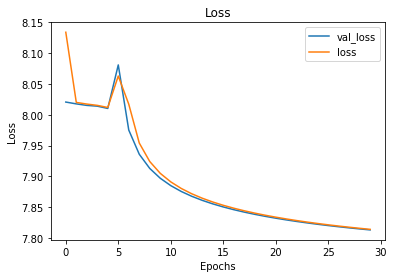

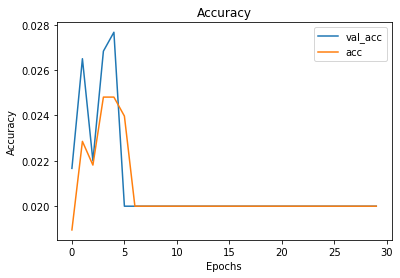

In [40]:
visualize_training_results(history)

## Model Notes

In [ ]:
#Accuracy is still very low, similar to baseline model level

# CNN Tuning

In [80]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(50, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

stopping_monitor = EarlyStopping(patience = 2)

history = model.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_labels),
                    callbacks = [stopping_monitor])

Train on 14350 samples, validate on 6000 samples
Epoch 1/30
14350/14350 [==============================] - 46s 3ms/step - loss: 3.8953 - acc: 0.0262 - val_loss: 3.8319 - val_acc: 0.0363
Epoch 2/30
14350/14350 [==============================] - 46s 3ms/step - loss: 3.8117 - acc: 0.0410 - val_loss: 3.7765 - val_acc: 0.0430
Epoch 3/30
14350/14350 [==============================] - 44s 3ms/step - loss: 3.7578 - acc: 0.0494 - val_loss: 3.7487 - val_acc: 0.0488
Epoch 4/30
14350/14350 [==============================] - 44s 3ms/step - loss: 3.7054 - acc: 0.0600 - val_loss: 3.7653 - val_acc: 0.0553
Epoch 5/30
14350/14350 [==============================] - 44s 3ms/step - loss: 3.6477 - acc: 0.0711 - val_loss: 3.6514 - val_acc: 0.0755
Epoch 6/30
14350/14350 [==============================] - 44s 3ms/step - loss: 3.6022 - acc: 0.0794 - val_loss: 3.6462 - val_acc: 0.0757
Epoch 7/30
14350/14350 [==============================] - 45s 3ms/step - loss: 3.5622 - acc: 0.0861 - val_loss: 3.5890 - val_acc:

In [81]:
model.save('model.cnn_tuning')
model.save_weights('model_weights.cnn_tuning')

In [82]:
results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(test_images, test_labels)

3550/3550 [==============================] - 3s 797us/step


In [84]:
results_train

[3.48278771317379, 0.1082926829299445]

In [85]:
results_test

[3.581225130322953, 0.09014084508301506]

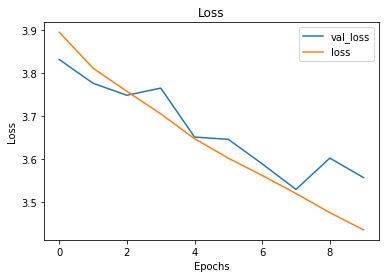

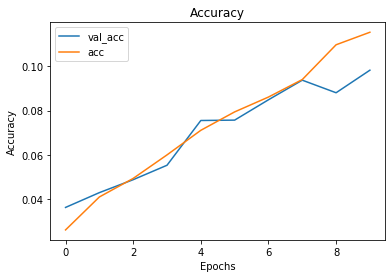

In [83]:
visualize_training_results(history)

## Model Notes

In [ ]:
#Highest accuracy we've seen yet ~10% from ~2%
#Loss is also lower (from 7.8 in our CNN baseline to 3.5 in this model)
#We do see some diverging (overfitting) around epoch 7

# CNN Gridsearch

## GridSearch

In [24]:
from tensorflow.keras.models import Sequential

In [62]:
def dense_network(x_train, y_train, x_val, y_val, params):

    # we build the model exactly like we would normally do it
    model = models.Sequential()

    # hidden layers
    model.add(layers.Conv2D(params['nodes1'], (3, 3), activation=params['activation1'],
                            input_shape=(64, 64, 3)))

    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(params['nodes1'], (3, 3), activation=params['activation1']))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(params['nodes1'], (3, 3), activation=params['activation1']))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(params['nodes1'], (3, 3), activation=params['activation1']))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Dropout(params['dropout']))
    
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64,  activation=params['activation2']))
    model.add(layers.Dense(128, activation=params['activation2']))
    model.add(layers.Dense(256, activation=params['activation2']))
    model.add(layers.Dense(512, activation=params['activation2']))

    # output layer
    model.add(layers.Dense(50, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    
    stopping_monitor = EarlyStopping(patience = 2)
    
    out = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks = [stopping_monitor])
    
    return out, model

In [65]:
params = {'dropout': [0.1, 0.3, 0.5], 
          'nodes1': [32, 64, 128],
          'optimizer': ['adam', 'sgd'], 
          'activation1': ['relu', 'tanh'], 
          'activation2': ['relu', 'tanh','softmax']}

In [66]:
results = talos.Scan(train_images, train_labels,x_val=val_images,y_val=val_labels, 
                     params=params, model=dense_network, experiment_name='grid')



















  0%|          | 0/108 [00:00<?, ?it/s]

Epoch 1/30
449/449 [==============================] - 25s 54ms/step - loss: 3.9133 - accuracy: 0.0186 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 25s 56ms/step - loss: 3.9124 - accuracy: 0.0201 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 25s 55ms/step - loss: 3.9123 - accuracy: 0.0169 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9123 - accuracy: 0.0198 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9123 - accuracy: 0.0156 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9123 - accuracy: 0.0215 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 7/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9124 - accuracy: 0.0188 - val_loss: 3.9120 - val_accuracy:


















  1%|          | 1/108 [03:23<6:02:33, 203.30s/it]

Epoch 1/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9121 - accuracy: 0.0189 - val_loss: 3.9118 - val_accuracy: 0.0222
Epoch 2/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9118 - accuracy: 0.0217 - val_loss: 3.9115 - val_accuracy: 0.0252
Epoch 3/30
449/449 [==============================] - 26s 58ms/step - loss: 3.9115 - accuracy: 0.0238 - val_loss: 3.9111 - val_accuracy: 0.0255
Epoch 4/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9113 - accuracy: 0.0232 - val_loss: 3.9107 - val_accuracy: 0.0258
Epoch 5/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9109 - accuracy: 0.0259 - val_loss: 3.9102 - val_accuracy: 0.0247
Epoch 6/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9101 - accuracy: 0.0278 - val_loss: 3.9095 - val_accuracy: 0.0347
Epoch 7/30
449/449 [==============================] - 25s 57ms/step - loss: 3.9097 - accuracy: 0.0306 - val_loss: 3.9085 - val_accuracy:


















  2%|▏         | 2/108 [14:06<9:52:24, 335.32s/it]

Epoch 1/30
449/449 [==============================] - 47s 103ms/step - loss: 3.9133 - accuracy: 0.0162 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 46s 103ms/step - loss: 3.9125 - accuracy: 0.0190 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 46s 102ms/step - loss: 3.9123 - accuracy: 0.0186 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 46s 101ms/step - loss: 3.9123 - accuracy: 0.0177 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 46s 102ms/step - loss: 3.9124 - accuracy: 0.0180 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 46s 102ms/step - loss: 3.9123 - accuracy: 0.0179 - val_loss: 3.9120 - val_accuracy: 0.0200



















  3%|▎         | 3/108 [18:42<9:15:49, 317.62s/it]

Epoch 1/30
449/449 [==============================] - 47s 104ms/step - loss: 3.9123 - accuracy: 0.0202 - val_loss: 3.9118 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 47s 104ms/step - loss: 3.9118 - accuracy: 0.0187 - val_loss: 3.9114 - val_accuracy: 0.0205
Epoch 3/30
449/449 [==============================] - 47s 104ms/step - loss: 3.9115 - accuracy: 0.0221 - val_loss: 3.9110 - val_accuracy: 0.0212
Epoch 4/30
449/449 [==============================] - 46s 103ms/step - loss: 3.9111 - accuracy: 0.0220 - val_loss: 3.9106 - val_accuracy: 0.0303
Epoch 5/30
449/449 [==============================] - 46s 103ms/step - loss: 3.9109 - accuracy: 0.0240 - val_loss: 3.9099 - val_accuracy: 0.0300
Epoch 6/30
449/449 [==============================] - 46s 103ms/step - loss: 3.9103 - accuracy: 0.0291 - val_loss: 3.9091 - val_accuracy: 0.0325
Epoch 7/30
449/449 [==============================] - 46s 103ms/step - loss: 3.9091 - accuracy: 0.0289 - val_loss: 3.9076 - val_ac


















  4%|▎         | 4/108 [37:14<16:03:18, 555.76s/it]

Epoch 1/30
449/449 [==============================] - 96s 213ms/step - loss: 3.9134 - accuracy: 0.0186 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 95s 211ms/step - loss: 3.9123 - accuracy: 0.0200 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 95s 212ms/step - loss: 3.9123 - accuracy: 0.0202 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 95s 211ms/step - loss: 3.9123 - accuracy: 0.0192 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 95s 211ms/step - loss: 3.9123 - accuracy: 0.0191 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 95s 211ms/step - loss: 3.9123 - accuracy: 0.0186 - val_loss: 3.9120 - val_accuracy: 0.0200



















  5%|▍         | 5/108 [46:45<16:01:44, 560.24s/it]

Epoch 1/30
449/449 [==============================] - 97s 214ms/step - loss: 3.9123 - accuracy: 0.0194 - val_loss: 3.9118 - val_accuracy: 0.0215
Epoch 2/30
449/449 [==============================] - 96s 213ms/step - loss: 3.9120 - accuracy: 0.0231 - val_loss: 3.9115 - val_accuracy: 0.0215
Epoch 3/30
449/449 [==============================] - 96s 214ms/step - loss: 3.9117 - accuracy: 0.0241 - val_loss: 3.9112 - val_accuracy: 0.0220
Epoch 4/30
449/449 [==============================] - 95s 212ms/step - loss: 3.9116 - accuracy: 0.0236 - val_loss: 3.9109 - val_accuracy: 0.0215
Epoch 5/30
449/449 [==============================] - 95s 213ms/step - loss: 3.9110 - accuracy: 0.0224 - val_loss: 3.9103 - val_accuracy: 0.0267
Epoch 6/30
449/449 [==============================] - 95s 213ms/step - loss: 3.9105 - accuracy: 0.0269 - val_loss: 3.9096 - val_accuracy: 0.0323
Epoch 7/30
449/449 [==============================] - 96s 213ms/step - loss: 3.9096 - accuracy: 0.0267 - val_loss: 3.9085 - val_ac


















  6%|▌         | 6/108 [1:38:01<37:15:45, 1315.15s/it]

Epoch 1/30
449/449 [==============================] - 25s 56ms/step - loss: 3.9132 - accuracy: 0.0194 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9123 - accuracy: 0.0212 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 27s 61ms/step - loss: 3.9123 - accuracy: 0.0202 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9123 - accuracy: 0.0178 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 26s 58ms/step - loss: 3.9123 - accuracy: 0.0184 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 25s 56ms/step - loss: 3.9124 - accuracy: 0.0190 - val_loss: 3.9122 - val_accuracy: 0.0200
Epoch 7/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9125 - accuracy: 0.0215 - val_loss: 3.9120 - val_accuracy:


















  6%|▋         | 7/108 [1:41:07<27:23:34, 976.38s/it] 

Epoch 1/30
449/449 [==============================] - 28s 61ms/step - loss: 3.9124 - accuracy: 0.0186 - val_loss: 3.9120 - val_accuracy: 0.0203
Epoch 2/30
449/449 [==============================] - 28s 61ms/step - loss: 3.9121 - accuracy: 0.0154 - val_loss: 3.9116 - val_accuracy: 0.0153
Epoch 3/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9118 - accuracy: 0.0202 - val_loss: 3.9114 - val_accuracy: 0.0175
Epoch 4/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9117 - accuracy: 0.0188 - val_loss: 3.9110 - val_accuracy: 0.0195
Epoch 5/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9114 - accuracy: 0.0218 - val_loss: 3.9106 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9110 - accuracy: 0.0214 - val_loss: 3.9102 - val_accuracy: 0.0210
Epoch 7/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9105 - accuracy: 0.0247 - val_loss: 3.9094 - val_accuracy:


















  7%|▋         | 8/108 [1:54:39<25:45:12, 927.13s/it]

Epoch 1/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9136 - accuracy: 0.0191 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9123 - accuracy: 0.0192 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9123 - accuracy: 0.0206 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 47s 106ms/step - loss: 3.9123 - accuracy: 0.0210 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9123 - accuracy: 0.0162 - val_loss: 3.9120 - val_accuracy: 0.0200



















  8%|▊         | 9/108 [1:58:37<19:48:23, 720.24s/it]

Epoch 1/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9121 - accuracy: 0.0196 - val_loss: 3.9117 - val_accuracy: 0.0250
Epoch 2/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9120 - accuracy: 0.0210 - val_loss: 3.9115 - val_accuracy: 0.0235
Epoch 3/30
449/449 [==============================] - 47s 106ms/step - loss: 3.9116 - accuracy: 0.0235 - val_loss: 3.9112 - val_accuracy: 0.0240
Epoch 4/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9115 - accuracy: 0.0236 - val_loss: 3.9107 - val_accuracy: 0.0307
Epoch 5/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9112 - accuracy: 0.0276 - val_loss: 3.9102 - val_accuracy: 0.0302
Epoch 6/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9107 - accuracy: 0.0275 - val_loss: 3.9094 - val_accuracy: 0.0362
Epoch 7/30
449/449 [==============================] - 47s 106ms/step - loss: 3.9101 - accuracy: 0.0314 - val_loss: 3.9085 - val_ac


















  9%|▉         | 10/108 [3:09:20<48:22:36, 1777.11s/it]

Epoch 1/30
449/449 [==============================] - 97s 215ms/step - loss: 3.9135 - accuracy: 0.0176 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 96s 214ms/step - loss: 3.9123 - accuracy: 0.0174 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 96s 214ms/step - loss: 3.9123 - accuracy: 0.0203 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 95s 212ms/step - loss: 3.9124 - accuracy: 0.0186 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 96s 214ms/step - loss: 3.9123 - accuracy: 0.0207 - val_loss: 3.9120 - val_accuracy: 0.0200



















 10%|█         | 11/108 [3:17:21<37:24:20, 1388.25s/it]

Epoch 1/30
449/449 [==============================] - 97s 215ms/step - loss: 3.9126 - accuracy: 0.0176 - val_loss: 3.9119 - val_accuracy: 0.0192
Epoch 2/30
449/449 [==============================] - 96s 215ms/step - loss: 3.9123 - accuracy: 0.0204 - val_loss: 3.9116 - val_accuracy: 0.0195
Epoch 3/30
449/449 [==============================] - 97s 215ms/step - loss: 3.9118 - accuracy: 0.0192 - val_loss: 3.9114 - val_accuracy: 0.0240
Epoch 4/30
449/449 [==============================] - 96s 215ms/step - loss: 3.9117 - accuracy: 0.0206 - val_loss: 3.9109 - val_accuracy: 0.0285
Epoch 5/30
449/449 [==============================] - 96s 215ms/step - loss: 3.9114 - accuracy: 0.0242 - val_loss: 3.9102 - val_accuracy: 0.0297
Epoch 6/30
449/449 [==============================] - 96s 215ms/step - loss: 3.9108 - accuracy: 0.0239 - val_loss: 3.9091 - val_accuracy: 0.0367
Epoch 7/30
449/449 [==============================] - 96s 214ms/step - loss: 3.9096 - accuracy: 0.0266 - val_loss: 3.9072 - val_ac


















 11%|█         | 12/108 [4:05:29<49:01:20, 1838.34s/it]

Epoch 1/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9093 - accuracy: 0.0201 - val_loss: 3.8345 - val_accuracy: 0.0345
Epoch 2/30
449/449 [==============================] - 26s 57ms/step - loss: 3.8289 - accuracy: 0.0365 - val_loss: 3.7896 - val_accuracy: 0.0470
Epoch 3/30
449/449 [==============================] - 26s 57ms/step - loss: 3.7800 - accuracy: 0.0430 - val_loss: 3.7160 - val_accuracy: 0.0532
Epoch 4/30
449/449 [==============================] - 26s 57ms/step - loss: 3.7278 - accuracy: 0.0508 - val_loss: 3.6551 - val_accuracy: 0.0600
Epoch 5/30
449/449 [==============================] - 26s 57ms/step - loss: 3.6681 - accuracy: 0.0582 - val_loss: 3.6449 - val_accuracy: 0.0588
Epoch 6/30
449/449 [==============================] - 26s 57ms/step - loss: 3.6411 - accuracy: 0.0613 - val_loss: 3.6336 - val_accuracy: 0.0590
Epoch 7/30
449/449 [==============================] - 26s 57ms/step - loss: 3.5925 - accuracy: 0.0757 - val_loss: 3.6154 - val_accuracy:


















 12%|█▏        | 13/108 [4:18:19<40:03:00, 1517.69s/it]

Epoch 1/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9128 - accuracy: 0.0185 - val_loss: 3.9120 - val_accuracy: 0.0203
Epoch 2/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9126 - accuracy: 0.0179 - val_loss: 3.9118 - val_accuracy: 0.0182
Epoch 3/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9120 - accuracy: 0.0180 - val_loss: 3.9117 - val_accuracy: 0.0187
Epoch 4/30
449/449 [==============================] - 26s 58ms/step - loss: 3.9120 - accuracy: 0.0203 - val_loss: 3.9116 - val_accuracy: 0.0230
Epoch 5/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9116 - accuracy: 0.0210 - val_loss: 3.9115 - val_accuracy: 0.0218
Epoch 6/30
449/449 [==============================] - 26s 58ms/step - loss: 3.9119 - accuracy: 0.0222 - val_loss: 3.9113 - val_accuracy: 0.0300
Epoch 7/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9115 - accuracy: 0.0252 - val_loss: 3.9111 - val_accuracy:


















 13%|█▎        | 14/108 [4:31:14<33:48:29, 1294.79s/it]

Epoch 1/30
449/449 [==============================] - 47s 104ms/step - loss: 3.9116 - accuracy: 0.0224 - val_loss: 3.8330 - val_accuracy: 0.0357
Epoch 2/30
449/449 [==============================] - 46s 103ms/step - loss: 3.8415 - accuracy: 0.0318 - val_loss: 3.7847 - val_accuracy: 0.0370
Epoch 3/30
449/449 [==============================] - 46s 103ms/step - loss: 3.7824 - accuracy: 0.0367 - val_loss: 3.7565 - val_accuracy: 0.0405
Epoch 4/30
449/449 [==============================] - 46s 103ms/step - loss: 3.7599 - accuracy: 0.0388 - val_loss: 3.7396 - val_accuracy: 0.0468
Epoch 5/30
449/449 [==============================] - 46s 103ms/step - loss: 3.7285 - accuracy: 0.0465 - val_loss: 3.7262 - val_accuracy: 0.0453
Epoch 6/30
449/449 [==============================] - 46s 103ms/step - loss: 3.6882 - accuracy: 0.0574 - val_loss: 3.6588 - val_accuracy: 0.0577
Epoch 7/30
449/449 [==============================] - 46s 103ms/step - loss: 3.6288 - accuracy: 0.0658 - val_loss: 3.5712 - val_ac


















 14%|█▍        | 15/108 [4:51:47<32:58:14, 1276.28s/it]

Epoch 1/30
449/449 [==============================] - 49s 109ms/step - loss: 3.9122 - accuracy: 0.0193 - val_loss: 3.9119 - val_accuracy: 0.0185
Epoch 2/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9122 - accuracy: 0.0209 - val_loss: 3.9118 - val_accuracy: 0.0197
Epoch 3/30
449/449 [==============================] - 47s 104ms/step - loss: 3.9121 - accuracy: 0.0182 - val_loss: 3.9115 - val_accuracy: 0.0217
Epoch 4/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9119 - accuracy: 0.0195 - val_loss: 3.9113 - val_accuracy: 0.0255
Epoch 5/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9118 - accuracy: 0.0222 - val_loss: 3.9111 - val_accuracy: 0.0313
Epoch 6/30
449/449 [==============================] - 48s 108ms/step - loss: 3.9116 - accuracy: 0.0226 - val_loss: 3.9110 - val_accuracy: 0.0287
Epoch 7/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9112 - accuracy: 0.0224 - val_loss: 3.9106 - val_ac


















 15%|█▍        | 16/108 [5:14:41<33:21:54, 1305.59s/it]

Epoch 1/30
449/449 [==============================] - 97s 216ms/step - loss: 3.9141 - accuracy: 0.0193 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 96s 214ms/step - loss: 3.9123 - accuracy: 0.0159 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 95s 213ms/step - loss: 3.9124 - accuracy: 0.0165 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 96s 213ms/step - loss: 3.9123 - accuracy: 0.0183 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 96s 215ms/step - loss: 3.9125 - accuracy: 0.0177 - val_loss: 3.9120 - val_accuracy: 0.0200



















 16%|█▌        | 17/108 [5:22:42<26:45:04, 1058.29s/it]

Epoch 1/30
449/449 [==============================] - 98s 217ms/step - loss: 3.9122 - accuracy: 0.0197 - val_loss: 3.9119 - val_accuracy: 0.0202
Epoch 2/30
449/449 [==============================] - 97s 216ms/step - loss: 3.9120 - accuracy: 0.0198 - val_loss: 3.9117 - val_accuracy: 0.0198
Epoch 3/30
449/449 [==============================] - 97s 216ms/step - loss: 3.9118 - accuracy: 0.0160 - val_loss: 3.9115 - val_accuracy: 0.0212
Epoch 4/30
449/449 [==============================] - 97s 215ms/step - loss: 3.9117 - accuracy: 0.0191 - val_loss: 3.9113 - val_accuracy: 0.0258
Epoch 5/30
449/449 [==============================] - 97s 216ms/step - loss: 3.9114 - accuracy: 0.0234 - val_loss: 3.9110 - val_accuracy: 0.0223
Epoch 6/30
449/449 [==============================] - 97s 215ms/step - loss: 3.9111 - accuracy: 0.0208 - val_loss: 3.9104 - val_accuracy: 0.0257
Epoch 7/30
449/449 [==============================] - 97s 216ms/step - loss: 3.9108 - accuracy: 0.0243 - val_loss: 3.9098 - val_ac


















 17%|█▋        | 18/108 [5:59:51<35:14:24, 1409.60s/it]

Epoch 1/30
449/449 [==============================] - 26s 58ms/step - loss: 3.8780 - accuracy: 0.0266 - val_loss: 3.7143 - val_accuracy: 0.0588
Epoch 2/30
449/449 [==============================] - 26s 58ms/step - loss: 3.7171 - accuracy: 0.0607 - val_loss: 3.6629 - val_accuracy: 0.0710
Epoch 3/30
449/449 [==============================] - 26s 58ms/step - loss: 3.6258 - accuracy: 0.0754 - val_loss: 3.5681 - val_accuracy: 0.0897
Epoch 4/30
449/449 [==============================] - 26s 58ms/step - loss: 3.5723 - accuracy: 0.0809 - val_loss: 3.5496 - val_accuracy: 0.0920
Epoch 5/30
449/449 [==============================] - 26s 58ms/step - loss: 3.5074 - accuracy: 0.0958 - val_loss: 3.5254 - val_accuracy: 0.0872
Epoch 6/30
449/449 [==============================] - 26s 58ms/step - loss: 3.4590 - accuracy: 0.1042 - val_loss: 3.4417 - val_accuracy: 0.1060
Epoch 7/30
449/449 [==============================] - 26s 58ms/step - loss: 3.4008 - accuracy: 0.1123 - val_loss: 3.4653 - val_accuracy:


















 18%|█▊        | 19/108 [6:05:30<26:54:22, 1088.34s/it]

Epoch 1/30
449/449 [==============================] - 26s 58ms/step - loss: 3.9136 - accuracy: 0.0203 - val_loss: 3.9110 - val_accuracy: 0.0205
Epoch 2/30
449/449 [==============================] - 26s 58ms/step - loss: 3.9110 - accuracy: 0.0230 - val_loss: 3.9092 - val_accuracy: 0.0230
Epoch 3/30
449/449 [==============================] - 26s 58ms/step - loss: 3.9084 - accuracy: 0.0249 - val_loss: 3.9043 - val_accuracy: 0.0375
Epoch 4/30
449/449 [==============================] - 26s 58ms/step - loss: 3.9013 - accuracy: 0.0345 - val_loss: 3.8861 - val_accuracy: 0.0418
Epoch 5/30
449/449 [==============================] - 26s 58ms/step - loss: 3.8738 - accuracy: 0.0415 - val_loss: 3.8174 - val_accuracy: 0.0422
Epoch 6/30
449/449 [==============================] - 26s 58ms/step - loss: 3.7937 - accuracy: 0.0482 - val_loss: 3.7862 - val_accuracy: 0.0510
Epoch 7/30
449/449 [==============================] - 26s 58ms/step - loss: 3.7454 - accuracy: 0.0548 - val_loss: 3.7345 - val_accuracy:


















 19%|█▊        | 20/108 [6:14:38<22:38:23, 926.18s/it] 

Epoch 1/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9069 - accuracy: 0.0229 - val_loss: 3.7961 - val_accuracy: 0.0420
Epoch 2/30
449/449 [==============================] - 47s 104ms/step - loss: 3.7937 - accuracy: 0.0403 - val_loss: 3.6837 - val_accuracy: 0.0567
Epoch 3/30
449/449 [==============================] - 47s 104ms/step - loss: 3.6929 - accuracy: 0.0603 - val_loss: 3.6532 - val_accuracy: 0.0625
Epoch 4/30
449/449 [==============================] - 46s 103ms/step - loss: 3.5876 - accuracy: 0.0747 - val_loss: 3.5166 - val_accuracy: 0.0975
Epoch 5/30
449/449 [==============================] - 47s 104ms/step - loss: 3.4805 - accuracy: 0.0934 - val_loss: 3.4420 - val_accuracy: 0.1095
Epoch 6/30
449/449 [==============================] - 47s 104ms/step - loss: 3.3808 - accuracy: 0.1132 - val_loss: 3.3735 - val_accuracy: 0.1197
Epoch 7/30
449/449 [==============================] - 47s 105ms/step - loss: 3.3194 - accuracy: 0.1324 - val_loss: 3.4002 - val_ac


















 19%|█▉        | 21/108 [6:24:00<19:44:36, 816.97s/it]

Epoch 1/30
449/449 [==============================] - 48s 105ms/step - loss: 3.9136 - accuracy: 0.0198 - val_loss: 3.9095 - val_accuracy: 0.0252
Epoch 2/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9091 - accuracy: 0.0219 - val_loss: 3.9042 - val_accuracy: 0.0297
Epoch 3/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9026 - accuracy: 0.0301 - val_loss: 3.8870 - val_accuracy: 0.0405
Epoch 4/30
449/449 [==============================] - 47s 105ms/step - loss: 3.8773 - accuracy: 0.0385 - val_loss: 3.8614 - val_accuracy: 0.0333
Epoch 5/30
449/449 [==============================] - 47s 105ms/step - loss: 3.8143 - accuracy: 0.0449 - val_loss: 3.7950 - val_accuracy: 0.0510
Epoch 6/30
449/449 [==============================] - 47s 105ms/step - loss: 3.7661 - accuracy: 0.0491 - val_loss: 3.7287 - val_accuracy: 0.0608
Epoch 7/30
449/449 [==============================] - 47s 105ms/step - loss: 3.7100 - accuracy: 0.0598 - val_loss: 3.6779 - val_ac


















 20%|██        | 22/108 [6:31:52<17:02:42, 713.52s/it]

Epoch 1/30
449/449 [==============================] - 97s 216ms/step - loss: 3.9147 - accuracy: 0.0196 - val_loss: 3.8352 - val_accuracy: 0.0307
Epoch 2/30
449/449 [==============================] - 97s 215ms/step - loss: 3.8160 - accuracy: 0.0374 - val_loss: 3.8109 - val_accuracy: 0.0367
Epoch 3/30
449/449 [==============================] - 96s 215ms/step - loss: 3.7718 - accuracy: 0.0488 - val_loss: 3.6686 - val_accuracy: 0.0653
Epoch 4/30
449/449 [==============================] - 96s 214ms/step - loss: 3.6473 - accuracy: 0.0741 - val_loss: 3.5645 - val_accuracy: 0.0832
Epoch 5/30
449/449 [==============================] - 96s 214ms/step - loss: 3.5658 - accuracy: 0.0810 - val_loss: 3.5306 - val_accuracy: 0.0975
Epoch 6/30
449/449 [==============================] - 96s 214ms/step - loss: 3.4741 - accuracy: 0.0993 - val_loss: 3.5305 - val_accuracy: 0.1000
Epoch 7/30
449/449 [==============================] - 96s 215ms/step - loss: 3.4196 - accuracy: 0.1125 - val_loss: 3.3808 - val_ac


















 21%|██▏       | 23/108 [6:51:10<19:59:33, 846.75s/it]

Epoch 1/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9124 - accuracy: 0.0191 - val_loss: 3.9092 - val_accuracy: 0.0237
Epoch 2/30
449/449 [==============================] - 97s 217ms/step - loss: 3.9088 - accuracy: 0.0238 - val_loss: 3.9038 - val_accuracy: 0.0340
Epoch 3/30
449/449 [==============================] - 97s 217ms/step - loss: 3.9013 - accuracy: 0.0305 - val_loss: 3.8777 - val_accuracy: 0.0370
Epoch 4/30
449/449 [==============================] - 98s 217ms/step - loss: 3.8641 - accuracy: 0.0369 - val_loss: 3.8291 - val_accuracy: 0.0403
Epoch 5/30
449/449 [==============================] - 96s 215ms/step - loss: 3.8030 - accuracy: 0.0367 - val_loss: 3.7721 - val_accuracy: 0.0442
Epoch 6/30
449/449 [==============================] - 98s 218ms/step - loss: 3.7750 - accuracy: 0.0481 - val_loss: 3.7343 - val_accuracy: 0.0550
Epoch 7/30
449/449 [==============================] - 97s 217ms/step - loss: 3.7327 - accuracy: 0.0563 - val_loss: 3.8145 - val_ac


















 22%|██▏       | 24/108 [7:28:28<29:30:00, 1264.29s/it]

Epoch 1/30
449/449 [==============================] - 26s 58ms/step - loss: 3.9035 - accuracy: 0.0226 - val_loss: 3.7507 - val_accuracy: 0.0558
Epoch 2/30
449/449 [==============================] - 26s 58ms/step - loss: 3.7540 - accuracy: 0.0507 - val_loss: 3.6510 - val_accuracy: 0.0688
Epoch 3/30
449/449 [==============================] - 26s 58ms/step - loss: 3.6833 - accuracy: 0.0677 - val_loss: 3.7175 - val_accuracy: 0.0573
Epoch 4/30
449/449 [==============================] - 26s 57ms/step - loss: 3.6423 - accuracy: 0.0675 - val_loss: 3.6662 - val_accuracy: 0.0713



















 23%|██▎       | 25/108 [7:30:13<21:07:40, 916.39s/it] 

Epoch 1/30
449/449 [==============================] - 26s 57ms/step - loss: 3.9132 - accuracy: 0.0183 - val_loss: 3.9105 - val_accuracy: 0.0285
Epoch 2/30
449/449 [==============================] - 26s 58ms/step - loss: 3.9108 - accuracy: 0.0225 - val_loss: 3.9087 - val_accuracy: 0.0303
Epoch 3/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9092 - accuracy: 0.0261 - val_loss: 3.9050 - val_accuracy: 0.0253
Epoch 4/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9042 - accuracy: 0.0283 - val_loss: 3.8963 - val_accuracy: 0.0375
Epoch 5/30
449/449 [==============================] - 26s 59ms/step - loss: 3.8913 - accuracy: 0.0331 - val_loss: 3.8597 - val_accuracy: 0.0452
Epoch 6/30
449/449 [==============================] - 26s 59ms/step - loss: 3.8526 - accuracy: 0.0446 - val_loss: 3.8184 - val_accuracy: 0.0400
Epoch 7/30
449/449 [==============================] - 26s 59ms/step - loss: 3.7973 - accuracy: 0.0506 - val_loss: 3.7871 - val_accuracy:


















 24%|██▍       | 26/108 [7:41:42<19:19:23, 848.34s/it]

Epoch 1/30
449/449 [==============================] - 49s 107ms/step - loss: 3.9179 - accuracy: 0.0180 - val_loss: 3.9209 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9173 - accuracy: 0.0208 - val_loss: 3.9145 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 47s 104ms/step - loss: 3.9167 - accuracy: 0.0209 - val_loss: 3.9158 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 47s 104ms/step - loss: 3.9156 - accuracy: 0.0180 - val_loss: 3.9132 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 47s 104ms/step - loss: 3.9160 - accuracy: 0.0196 - val_loss: 3.9149 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 47s 104ms/step - loss: 3.9148 - accuracy: 0.0188 - val_loss: 3.9147 - val_accuracy: 0.0200



















 25%|██▌       | 27/108 [7:46:26<15:16:25, 678.84s/it]

Epoch 1/30
449/449 [==============================] - 48s 105ms/step - loss: 3.9123 - accuracy: 0.0201 - val_loss: 3.9105 - val_accuracy: 0.0232
Epoch 2/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9109 - accuracy: 0.0197 - val_loss: 3.9087 - val_accuracy: 0.0337
Epoch 3/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9090 - accuracy: 0.0268 - val_loss: 3.9053 - val_accuracy: 0.0298
Epoch 4/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9054 - accuracy: 0.0268 - val_loss: 3.8926 - val_accuracy: 0.0412
Epoch 5/30
449/449 [==============================] - 47s 105ms/step - loss: 3.8857 - accuracy: 0.0388 - val_loss: 3.8460 - val_accuracy: 0.0313
Epoch 6/30
449/449 [==============================] - 47s 105ms/step - loss: 3.8363 - accuracy: 0.0369 - val_loss: 3.8014 - val_accuracy: 0.0413
Epoch 7/30
449/449 [==============================] - 47s 105ms/step - loss: 3.8050 - accuracy: 0.0430 - val_loss: 3.7817 - val_ac


















 26%|██▌       | 28/108 [8:05:17<18:06:05, 814.57s/it]

Epoch 1/30
449/449 [==============================] - 97s 215ms/step - loss: 3.9178 - accuracy: 0.0194 - val_loss: 3.9138 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 96s 213ms/step - loss: 3.9163 - accuracy: 0.0182 - val_loss: 3.9169 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 96s 214ms/step - loss: 3.9167 - accuracy: 0.0191 - val_loss: 3.9144 - val_accuracy: 0.0200



















 27%|██▋       | 29/108 [8:10:06<14:24:58, 656.94s/it]

Epoch 1/30
449/449 [==============================] - 99s 219ms/step - loss: 3.9121 - accuracy: 0.0244 - val_loss: 3.9094 - val_accuracy: 0.0272
Epoch 2/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9093 - accuracy: 0.0229 - val_loss: 3.9042 - val_accuracy: 0.0440
Epoch 3/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9024 - accuracy: 0.0304 - val_loss: 3.8840 - val_accuracy: 0.0313
Epoch 4/30
449/449 [==============================] - 97s 216ms/step - loss: 3.8727 - accuracy: 0.0335 - val_loss: 3.8256 - val_accuracy: 0.0418
Epoch 5/30
449/449 [==============================] - 97s 217ms/step - loss: 3.8235 - accuracy: 0.0390 - val_loss: 3.7881 - val_accuracy: 0.0482
Epoch 6/30
449/449 [==============================] - 97s 217ms/step - loss: 3.7787 - accuracy: 0.0475 - val_loss: 3.7391 - val_accuracy: 0.0598
Epoch 7/30
449/449 [==============================] - 97s 217ms/step - loss: 3.7289 - accuracy: 0.0599 - val_loss: 3.6778 - val_ac


















 28%|██▊       | 30/108 [8:34:28<19:28:01, 898.48s/it]

Epoch 1/30
449/449 [==============================] - 27s 58ms/step - loss: 3.9055 - accuracy: 0.0226 - val_loss: 3.8055 - val_accuracy: 0.0418
Epoch 2/30
449/449 [==============================] - 26s 58ms/step - loss: 3.7977 - accuracy: 0.0435 - val_loss: 3.6997 - val_accuracy: 0.0583
Epoch 3/30
449/449 [==============================] - 26s 58ms/step - loss: 3.7169 - accuracy: 0.0620 - val_loss: 3.6136 - val_accuracy: 0.0725
Epoch 4/30
449/449 [==============================] - 26s 58ms/step - loss: 3.6422 - accuracy: 0.0650 - val_loss: 3.5261 - val_accuracy: 0.0933
Epoch 5/30
449/449 [==============================] - 26s 58ms/step - loss: 3.5570 - accuracy: 0.0850 - val_loss: 3.4814 - val_accuracy: 0.0973
Epoch 6/30
449/449 [==============================] - 26s 58ms/step - loss: 3.5092 - accuracy: 0.0911 - val_loss: 3.4321 - val_accuracy: 0.1038
Epoch 7/30
449/449 [==============================] - 26s 58ms/step - loss: 3.4611 - accuracy: 0.1008 - val_loss: 3.3625 - val_accuracy:


















 29%|██▊       | 31/108 [8:40:05<15:36:54, 730.05s/it]

Epoch 1/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9126 - accuracy: 0.0236 - val_loss: 3.9100 - val_accuracy: 0.0250
Epoch 2/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9095 - accuracy: 0.0259 - val_loss: 3.9073 - val_accuracy: 0.0263
Epoch 3/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9054 - accuracy: 0.0265 - val_loss: 3.8982 - val_accuracy: 0.0380
Epoch 4/30
449/449 [==============================] - 26s 59ms/step - loss: 3.8954 - accuracy: 0.0282 - val_loss: 3.8646 - val_accuracy: 0.0427
Epoch 5/30
449/449 [==============================] - 26s 58ms/step - loss: 3.8671 - accuracy: 0.0330 - val_loss: 3.8194 - val_accuracy: 0.0438
Epoch 6/30
449/449 [==============================] - 26s 58ms/step - loss: 3.8249 - accuracy: 0.0422 - val_loss: 3.7660 - val_accuracy: 0.0525
Epoch 7/30
449/449 [==============================] - 26s 58ms/step - loss: 3.7854 - accuracy: 0.0511 - val_loss: 3.7539 - val_accuracy:


















 30%|██▉       | 32/108 [8:51:01<14:56:22, 707.66s/it]

Epoch 1/30
449/449 [==============================] - 48s 105ms/step - loss: 3.9185 - accuracy: 0.0202 - val_loss: 3.9160 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 47s 104ms/step - loss: 3.9146 - accuracy: 0.0234 - val_loss: 3.9148 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 47s 104ms/step - loss: 3.9153 - accuracy: 0.0203 - val_loss: 3.9133 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 47s 104ms/step - loss: 3.9158 - accuracy: 0.0173 - val_loss: 3.9180 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 47s 104ms/step - loss: 3.9165 - accuracy: 0.0176 - val_loss: 3.9138 - val_accuracy: 0.0200



















 31%|███       | 33/108 [8:54:56<11:47:30, 566.01s/it]

Epoch 1/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9129 - accuracy: 0.0213 - val_loss: 3.9107 - val_accuracy: 0.0253
Epoch 2/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9102 - accuracy: 0.0250 - val_loss: 3.9080 - val_accuracy: 0.0257
Epoch 3/30
449/449 [==============================] - 47s 106ms/step - loss: 3.9090 - accuracy: 0.0245 - val_loss: 3.9034 - val_accuracy: 0.0392
Epoch 4/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9023 - accuracy: 0.0275 - val_loss: 3.8871 - val_accuracy: 0.0400
Epoch 5/30
449/449 [==============================] - 47s 105ms/step - loss: 3.8798 - accuracy: 0.0334 - val_loss: 3.8284 - val_accuracy: 0.0450
Epoch 6/30
449/449 [==============================] - 47s 105ms/step - loss: 3.8280 - accuracy: 0.0422 - val_loss: 3.7964 - val_accuracy: 0.0508
Epoch 7/30
449/449 [==============================] - 47s 105ms/step - loss: 3.7665 - accuracy: 0.0561 - val_loss: 3.7136 - val_ac


















 31%|███▏      | 34/108 [9:13:51<15:08:24, 736.55s/it]

Epoch 1/30
449/449 [==============================] - 98s 216ms/step - loss: 3.9179 - accuracy: 0.0220 - val_loss: 3.9147 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 97s 215ms/step - loss: 3.9159 - accuracy: 0.0187 - val_loss: 3.9154 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 96s 214ms/step - loss: 3.9161 - accuracy: 0.0177 - val_loss: 3.9146 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 96s 215ms/step - loss: 3.9157 - accuracy: 0.0200 - val_loss: 3.9141 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 96s 214ms/step - loss: 3.9157 - accuracy: 0.0206 - val_loss: 3.9169 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 96s 213ms/step - loss: 3.9160 - accuracy: 0.0186 - val_loss: 3.9156 - val_accuracy: 0.0200



















 32%|███▏      | 35/108 [9:23:29<13:58:33, 689.22s/it]

Epoch 1/30
449/449 [==============================] - 98s 219ms/step - loss: 3.9138 - accuracy: 0.0196 - val_loss: 3.9104 - val_accuracy: 0.0223
Epoch 2/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9106 - accuracy: 0.0195 - val_loss: 3.9077 - val_accuracy: 0.0235
Epoch 3/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9070 - accuracy: 0.0276 - val_loss: 3.8988 - val_accuracy: 0.0382
Epoch 4/30
449/449 [==============================] - 98s 218ms/step - loss: 3.8929 - accuracy: 0.0293 - val_loss: 3.8538 - val_accuracy: 0.0378
Epoch 5/30
449/449 [==============================] - 98s 218ms/step - loss: 3.8421 - accuracy: 0.0405 - val_loss: 3.8050 - val_accuracy: 0.0453
Epoch 6/30
449/449 [==============================] - 95s 211ms/step - loss: 3.8151 - accuracy: 0.0447 - val_loss: 3.7945 - val_accuracy: 0.0455
Epoch 7/30
449/449 [==============================] - 98s 218ms/step - loss: 3.7674 - accuracy: 0.0511 - val_loss: 3.7258 - val_ac


















 33%|███▎      | 36/108 [9:51:09<19:36:21, 980.31s/it]

Epoch 1/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9127 - accuracy: 0.0168 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9126 - accuracy: 0.0177 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9126 - accuracy: 0.0189 - val_loss: 3.9121 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9127 - accuracy: 0.0191 - val_loss: 3.9121 - val_accuracy: 0.0200



















 34%|███▍      | 37/108 [9:52:56<14:09:56, 718.26s/it]

Epoch 1/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9121 - accuracy: 0.0182 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9121 - accuracy: 0.0192 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9121 - accuracy: 0.0208 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9121 - accuracy: 0.0215 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9121 - accuracy: 0.0187 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9121 - accuracy: 0.0169 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 7/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9121 - accuracy: 0.0198 - val_loss: 3.9120 - val_accuracy:


















 35%|███▌      | 38/108 [9:56:28<11:00:43, 566.34s/it]

Epoch 1/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9126 - accuracy: 0.0215 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9126 - accuracy: 0.0207 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9128 - accuracy: 0.0180 - val_loss: 3.9120 - val_accuracy: 0.0200



















 36%|███▌      | 39/108 [9:58:52<8:25:32, 439.60s/it] 

Epoch 1/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9121 - accuracy: 0.0182 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9121 - accuracy: 0.0214 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 47s 104ms/step - loss: 3.9121 - accuracy: 0.0180 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9121 - accuracy: 0.0222 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9121 - accuracy: 0.0176 - val_loss: 3.9120 - val_accuracy: 0.0200



















 37%|███▋      | 40/108 [10:02:50<7:09:40, 379.12s/it]

Epoch 1/30
449/449 [==============================] - 97s 215ms/step - loss: 3.9127 - accuracy: 0.0191 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 98s 219ms/step - loss: 3.9126 - accuracy: 0.0200 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9127 - accuracy: 0.0203 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9126 - accuracy: 0.0200 - val_loss: 3.9120 - val_accuracy: 0.0200



















 38%|███▊      | 41/108 [10:09:21<7:07:35, 382.92s/it]

Epoch 1/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9121 - accuracy: 0.0165 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9121 - accuracy: 0.0205 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9121 - accuracy: 0.0195 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 97s 217ms/step - loss: 3.9121 - accuracy: 0.0172 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9121 - accuracy: 0.0182 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 97s 217ms/step - loss: 3.9121 - accuracy: 0.0181 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 7/30
449/449 [==============================] - 97s 216ms/step - loss: 3.9121 - accuracy: 0.0174 - val_loss: 3.9120 - val_ac


















 39%|███▉      | 42/108 [10:20:45<8:40:29, 473.18s/it]

Epoch 1/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9126 - accuracy: 0.0228 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9126 - accuracy: 0.0186 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9126 - accuracy: 0.0193 - val_loss: 3.9121 - val_accuracy: 0.0200



















 40%|███▉      | 43/108 [10:22:05<6:24:49, 355.23s/it]

Epoch 1/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9121 - accuracy: 0.0199 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9121 - accuracy: 0.0184 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9121 - accuracy: 0.0215 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9121 - accuracy: 0.0209 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9121 - accuracy: 0.0187 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9121 - accuracy: 0.0205 - val_loss: 3.9120 - val_accuracy: 0.0200



















 41%|████      | 44/108 [10:24:44<5:16:11, 296.43s/it]

Epoch 1/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9127 - accuracy: 0.0168 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9126 - accuracy: 0.0169 - val_loss: 3.9121 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9127 - accuracy: 0.0190 - val_loss: 3.9120 - val_accuracy: 0.0200



















 42%|████▏     | 45/108 [10:27:08<4:23:15, 250.73s/it]

Epoch 1/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9121 - accuracy: 0.0197 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 47s 106ms/step - loss: 3.9121 - accuracy: 0.0199 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9121 - accuracy: 0.0167 - val_loss: 3.9120 - val_accuracy: 0.0200



















 43%|████▎     | 46/108 [10:29:32<3:45:45, 218.48s/it]

Epoch 1/30
449/449 [==============================] - 100s 221ms/step - loss: 3.9126 - accuracy: 0.0177 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 99s 220ms/step - loss: 3.9127 - accuracy: 0.0189 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 98s 219ms/step - loss: 3.9127 - accuracy: 0.0177 - val_loss: 3.9121 - val_accuracy: 0.0200



















 44%|████▎     | 47/108 [10:34:29<4:06:07, 242.09s/it]

Epoch 1/30
449/449 [==============================] - 99s 219ms/step - loss: 3.9121 - accuracy: 0.0176 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9121 - accuracy: 0.0183 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9121 - accuracy: 0.0179 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9121 - accuracy: 0.0194 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9121 - accuracy: 0.0199 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9121 - accuracy: 0.0169 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 7/30
449/449 [==============================] - 98s 219ms/step - loss: 3.9121 - accuracy: 0.0170 - val_loss: 3.9120 - val_ac


















 44%|████▍     | 48/108 [10:45:55<6:15:22, 375.38s/it]

Epoch 1/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9128 - accuracy: 0.0188 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9126 - accuracy: 0.0196 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9126 - accuracy: 0.0192 - val_loss: 3.9121 - val_accuracy: 0.0200



















 45%|████▌     | 49/108 [10:47:16<4:42:11, 286.97s/it]

Epoch 1/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9121 - accuracy: 0.0174 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9121 - accuracy: 0.0204 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 26s 58ms/step - loss: 3.9120 - accuracy: 0.0212 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 26s 58ms/step - loss: 3.9121 - accuracy: 0.0174 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9121 - accuracy: 0.0179 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9121 - accuracy: 0.0231 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 7/30
449/449 [==============================] - 26s 59ms/step - loss: 3.9121 - accuracy: 0.0207 - val_loss: 3.9120 - val_accuracy:


















 46%|████▋     | 50/108 [10:50:47<4:15:28, 264.29s/it]

Epoch 1/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9127 - accuracy: 0.0198 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9127 - accuracy: 0.0187 - val_loss: 3.9121 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9126 - accuracy: 0.0189 - val_loss: 3.9120 - val_accuracy: 0.0200



















 47%|████▋     | 51/108 [10:53:11<3:36:44, 228.14s/it]

Epoch 1/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9121 - accuracy: 0.0204 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 47s 106ms/step - loss: 3.9121 - accuracy: 0.0182 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9121 - accuracy: 0.0196 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 47s 106ms/step - loss: 3.9121 - accuracy: 0.0186 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 47s 105ms/step - loss: 3.9121 - accuracy: 0.0196 - val_loss: 3.9120 - val_accuracy: 0.0200



















 48%|████▊     | 52/108 [10:57:09<3:35:39, 231.07s/it]

Epoch 1/30
449/449 [==============================] - 99s 220ms/step - loss: 3.9128 - accuracy: 0.0200 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 99s 220ms/step - loss: 3.9125 - accuracy: 0.0169 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 99s 220ms/step - loss: 3.9126 - accuracy: 0.0206 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 99s 220ms/step - loss: 3.9127 - accuracy: 0.0174 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9126 - accuracy: 0.0190 - val_loss: 3.9120 - val_accuracy: 0.0200



















 49%|████▉     | 53/108 [11:05:23<4:43:59, 309.81s/it]

Epoch 1/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9121 - accuracy: 0.0184 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 97s 217ms/step - loss: 3.9121 - accuracy: 0.0180 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 98s 219ms/step - loss: 3.9121 - accuracy: 0.0177 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 99s 220ms/step - loss: 3.9121 - accuracy: 0.0215 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9121 - accuracy: 0.0172 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 99s 220ms/step - loss: 3.9121 - accuracy: 0.0177 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 7/30
449/449 [==============================] - 98s 219ms/step - loss: 3.9121 - accuracy: 0.0186 - val_loss: 3.9120 - val_ac


















 50%|█████     | 54/108 [11:16:51<6:21:02, 423.38s/it]

Epoch 1/30
449/449 [==============================] - 28s 62ms/step - loss: 3.8754 - accuracy: 0.0306 - val_loss: 3.6747 - val_accuracy: 0.0690
Epoch 2/30
449/449 [==============================] - 28s 61ms/step - loss: 3.6554 - accuracy: 0.0684 - val_loss: 3.5805 - val_accuracy: 0.0797
Epoch 3/30
449/449 [==============================] - 28s 62ms/step - loss: 3.5590 - accuracy: 0.0778 - val_loss: 3.5508 - val_accuracy: 0.0885
Epoch 4/30
449/449 [==============================] - 28s 62ms/step - loss: 3.4834 - accuracy: 0.1000 - val_loss: 3.4541 - val_accuracy: 0.1060
Epoch 5/30
449/449 [==============================] - 27s 61ms/step - loss: 3.3889 - accuracy: 0.1208 - val_loss: 3.4271 - val_accuracy: 0.1120
Epoch 6/30
449/449 [==============================] - 27s 61ms/step - loss: 3.3290 - accuracy: 0.1274 - val_loss: 3.4481 - val_accuracy: 0.1145
Epoch 7/30
449/449 [==============================] - 27s 61ms/step - loss: 3.2448 - accuracy: 0.1427 - val_loss: 3.4030 - val_accuracy:


















 51%|█████     | 55/108 [11:21:55<5:42:24, 387.64s/it]

Epoch 1/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9120 - accuracy: 0.0213 - val_loss: 3.9109 - val_accuracy: 0.0222
Epoch 2/30
449/449 [==============================] - 28s 61ms/step - loss: 3.9111 - accuracy: 0.0212 - val_loss: 3.9098 - val_accuracy: 0.0250
Epoch 3/30
449/449 [==============================] - 27s 61ms/step - loss: 3.9099 - accuracy: 0.0266 - val_loss: 3.9074 - val_accuracy: 0.0282
Epoch 4/30
449/449 [==============================] - 27s 61ms/step - loss: 3.9076 - accuracy: 0.0247 - val_loss: 3.9029 - val_accuracy: 0.0270
Epoch 5/30
449/449 [==============================] - 27s 61ms/step - loss: 3.9018 - accuracy: 0.0277 - val_loss: 3.8928 - val_accuracy: 0.0330
Epoch 6/30
449/449 [==============================] - 28s 61ms/step - loss: 3.8908 - accuracy: 0.0333 - val_loss: 3.8745 - val_accuracy: 0.0352
Epoch 7/30
449/449 [==============================] - 28s 61ms/step - loss: 3.8690 - accuracy: 0.0372 - val_loss: 3.8502 - val_accuracy:


















 52%|█████▏    | 56/108 [11:32:50<6:45:30, 467.89s/it]

Epoch 1/30
449/449 [==============================] - 50s 110ms/step - loss: 3.8777 - accuracy: 0.0282 - val_loss: 3.7649 - val_accuracy: 0.0443
Epoch 2/30
449/449 [==============================] - 49s 110ms/step - loss: 3.7487 - accuracy: 0.0507 - val_loss: 3.6446 - val_accuracy: 0.0653
Epoch 3/30
449/449 [==============================] - 49s 110ms/step - loss: 3.6447 - accuracy: 0.0657 - val_loss: 3.5927 - val_accuracy: 0.0817
Epoch 4/30
449/449 [==============================] - 49s 110ms/step - loss: 3.5600 - accuracy: 0.0815 - val_loss: 3.5470 - val_accuracy: 0.0832
Epoch 5/30
449/449 [==============================] - 49s 110ms/step - loss: 3.4854 - accuracy: 0.0995 - val_loss: 3.5347 - val_accuracy: 0.0912
Epoch 6/30
449/449 [==============================] - 49s 110ms/step - loss: 3.4126 - accuracy: 0.1114 - val_loss: 3.4809 - val_accuracy: 0.0997
Epoch 7/30
449/449 [==============================] - 49s 110ms/step - loss: 3.3440 - accuracy: 0.1258 - val_loss: 3.4204 - val_ac


















 53%|█████▎    | 57/108 [11:43:34<7:22:25, 520.51s/it]

Epoch 1/30
449/449 [==============================] - 50s 110ms/step - loss: 3.9121 - accuracy: 0.0208 - val_loss: 3.9102 - val_accuracy: 0.0288
Epoch 2/30
449/449 [==============================] - 49s 110ms/step - loss: 3.9097 - accuracy: 0.0294 - val_loss: 3.9064 - val_accuracy: 0.0360
Epoch 3/30
449/449 [==============================] - 49s 109ms/step - loss: 3.9061 - accuracy: 0.0318 - val_loss: 3.8974 - val_accuracy: 0.0363
Epoch 4/30
449/449 [==============================] - 49s 110ms/step - loss: 3.8946 - accuracy: 0.0337 - val_loss: 3.8787 - val_accuracy: 0.0350
Epoch 5/30
449/449 [==============================] - 49s 110ms/step - loss: 3.8584 - accuracy: 0.0358 - val_loss: 3.8175 - val_accuracy: 0.0398
Epoch 6/30
449/449 [==============================] - 49s 110ms/step - loss: 3.8157 - accuracy: 0.0411 - val_loss: 3.8012 - val_accuracy: 0.0430
Epoch 7/30
449/449 [==============================] - 49s 109ms/step - loss: 3.7978 - accuracy: 0.0429 - val_loss: 3.8162 - val_ac


















 54%|█████▎    | 58/108 [12:01:39<9:35:03, 690.07s/it]

Epoch 1/30
449/449 [==============================] - 101s 225ms/step - loss: 3.9195 - accuracy: 0.0175 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 101s 225ms/step - loss: 3.9123 - accuracy: 0.0210 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 101s 224ms/step - loss: 3.9124 - accuracy: 0.0175 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9123 - accuracy: 0.0185 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9123 - accuracy: 0.0207 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 101s 224ms/step - loss: 3.9123 - accuracy: 0.0195 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 7/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9123 - accuracy: 0.0183 - val_loss: 3.9120 -


















 55%|█████▍    | 59/108 [12:15:04<9:51:33, 724.35s/it]

Epoch 1/30
449/449 [==============================] - 101s 225ms/step - loss: 3.9109 - accuracy: 0.0195 - val_loss: 3.9095 - val_accuracy: 0.0195
Epoch 2/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9089 - accuracy: 0.0223 - val_loss: 3.9054 - val_accuracy: 0.0263
Epoch 3/30
449/449 [==============================] - 101s 224ms/step - loss: 3.9039 - accuracy: 0.0271 - val_loss: 3.8962 - val_accuracy: 0.0307
Epoch 4/30
449/449 [==============================] - 99s 221ms/step - loss: 3.8940 - accuracy: 0.0272 - val_loss: 3.8722 - val_accuracy: 0.0318
Epoch 5/30
449/449 [==============================] - 100s 223ms/step - loss: 3.8606 - accuracy: 0.0355 - val_loss: 3.8236 - val_accuracy: 0.0458
Epoch 6/30
449/449 [==============================] - 100s 223ms/step - loss: 3.8207 - accuracy: 0.0405 - val_loss: 3.7854 - val_accuracy: 0.0458
Epoch 7/30
449/449 [==============================] - 100s 223ms/step - loss: 3.7854 - accuracy: 0.0460 - val_loss: 3.7710 - 


















 56%|█████▌    | 60/108 [12:43:31<13:35:24, 1019.26s/it]

Epoch 1/30
449/449 [==============================] - 28s 62ms/step - loss: 3.8835 - accuracy: 0.0264 - val_loss: 3.7696 - val_accuracy: 0.0478
Epoch 2/30
449/449 [==============================] - 28s 61ms/step - loss: 3.7444 - accuracy: 0.0537 - val_loss: 3.6394 - val_accuracy: 0.0687
Epoch 3/30
449/449 [==============================] - 28s 62ms/step - loss: 3.6259 - accuracy: 0.0730 - val_loss: 3.5757 - val_accuracy: 0.0797
Epoch 4/30
449/449 [==============================] - 28s 61ms/step - loss: 3.5528 - accuracy: 0.0853 - val_loss: 3.4842 - val_accuracy: 0.0993
Epoch 5/30
449/449 [==============================] - 28s 62ms/step - loss: 3.4887 - accuracy: 0.0969 - val_loss: 3.4944 - val_accuracy: 0.0975
Epoch 6/30
449/449 [==============================] - 27s 60ms/step - loss: 3.4266 - accuracy: 0.1100 - val_loss: 3.4293 - val_accuracy: 0.1090
Epoch 7/30
449/449 [==============================] - 27s 61ms/step - loss: 3.3818 - accuracy: 0.1123 - val_loss: 3.3883 - val_accuracy:


















 56%|█████▋    | 61/108 [12:49:30<10:43:20, 821.29s/it] 

Epoch 1/30
449/449 [==============================] - 28s 61ms/step - loss: 3.9135 - accuracy: 0.0208 - val_loss: 3.9111 - val_accuracy: 0.0280
Epoch 2/30
449/449 [==============================] - 27s 61ms/step - loss: 3.9118 - accuracy: 0.0243 - val_loss: 3.9098 - val_accuracy: 0.0302
Epoch 3/30
449/449 [==============================] - 27s 61ms/step - loss: 3.9106 - accuracy: 0.0246 - val_loss: 3.9079 - val_accuracy: 0.0298
Epoch 4/30
449/449 [==============================] - 27s 61ms/step - loss: 3.9087 - accuracy: 0.0261 - val_loss: 3.9046 - val_accuracy: 0.0303
Epoch 5/30
449/449 [==============================] - 28s 61ms/step - loss: 3.9057 - accuracy: 0.0304 - val_loss: 3.8973 - val_accuracy: 0.0302
Epoch 6/30
449/449 [==============================] - 28s 61ms/step - loss: 3.8971 - accuracy: 0.0315 - val_loss: 3.8825 - val_accuracy: 0.0308
Epoch 7/30
449/449 [==============================] - 27s 61ms/step - loss: 3.8794 - accuracy: 0.0318 - val_loss: 3.8623 - val_accuracy:


















 57%|█████▋    | 62/108 [13:03:16<10:30:33, 822.47s/it]

Epoch 1/30
449/449 [==============================] - 50s 110ms/step - loss: 3.8898 - accuracy: 0.0301 - val_loss: 3.6957 - val_accuracy: 0.0608
Epoch 2/30
449/449 [==============================] - 49s 110ms/step - loss: 3.7102 - accuracy: 0.0601 - val_loss: 3.6256 - val_accuracy: 0.0768
Epoch 3/30
449/449 [==============================] - 49s 110ms/step - loss: 3.6244 - accuracy: 0.0707 - val_loss: 3.5709 - val_accuracy: 0.0813
Epoch 4/30
449/449 [==============================] - 49s 110ms/step - loss: 3.5610 - accuracy: 0.0830 - val_loss: 3.5210 - val_accuracy: 0.0878
Epoch 5/30
449/449 [==============================] - 49s 110ms/step - loss: 3.5204 - accuracy: 0.0878 - val_loss: 3.4900 - val_accuracy: 0.0980
Epoch 6/30
449/449 [==============================] - 50s 110ms/step - loss: 3.4635 - accuracy: 0.1066 - val_loss: 3.5054 - val_accuracy: 0.0995
Epoch 7/30
449/449 [==============================] - 49s 110ms/step - loss: 3.4098 - accuracy: 0.1100 - val_loss: 3.4461 - val_ac


















 58%|█████▊    | 63/108 [13:14:48<9:47:37, 783.49s/it] 

Epoch 1/30
449/449 [==============================] - 50s 110ms/step - loss: 3.9127 - accuracy: 0.0188 - val_loss: 3.9107 - val_accuracy: 0.0227
Epoch 2/30
449/449 [==============================] - 49s 109ms/step - loss: 3.9115 - accuracy: 0.0226 - val_loss: 3.9096 - val_accuracy: 0.0215
Epoch 3/30
449/449 [==============================] - 49s 110ms/step - loss: 3.9103 - accuracy: 0.0227 - val_loss: 3.9079 - val_accuracy: 0.0278
Epoch 4/30
449/449 [==============================] - 49s 109ms/step - loss: 3.9090 - accuracy: 0.0247 - val_loss: 3.9030 - val_accuracy: 0.0282
Epoch 5/30
449/449 [==============================] - 49s 110ms/step - loss: 3.9029 - accuracy: 0.0260 - val_loss: 3.8944 - val_accuracy: 0.0295
Epoch 6/30
449/449 [==============================] - 49s 110ms/step - loss: 3.8929 - accuracy: 0.0280 - val_loss: 3.8759 - val_accuracy: 0.0388
Epoch 7/30
449/449 [==============================] - 49s 110ms/step - loss: 3.8743 - accuracy: 0.0338 - val_loss: 3.8551 - val_ac


















 59%|█████▉    | 64/108 [13:32:05<10:30:15, 859.43s/it]

Epoch 1/30
449/449 [==============================] - 102s 226ms/step - loss: 3.9059 - accuracy: 0.0219 - val_loss: 3.7893 - val_accuracy: 0.0388
Epoch 2/30
449/449 [==============================] - 100s 224ms/step - loss: 3.8052 - accuracy: 0.0407 - val_loss: 3.7485 - val_accuracy: 0.0435
Epoch 3/30
449/449 [==============================] - 101s 224ms/step - loss: 3.7669 - accuracy: 0.0446 - val_loss: 3.7127 - val_accuracy: 0.0543
Epoch 4/30
449/449 [==============================] - 97s 217ms/step - loss: 3.7123 - accuracy: 0.0560 - val_loss: 3.6756 - val_accuracy: 0.0612
Epoch 5/30
449/449 [==============================] - 100s 224ms/step - loss: 3.6600 - accuracy: 0.0656 - val_loss: 3.6576 - val_accuracy: 0.0700
Epoch 6/30
449/449 [==============================] - 100s 224ms/step - loss: 3.6187 - accuracy: 0.0700 - val_loss: 3.5940 - val_accuracy: 0.0755
Epoch 7/30
449/449 [==============================] - 100s 224ms/step - loss: 3.5456 - accuracy: 0.0894 - val_loss: 3.5731 - 


















 60%|██████    | 65/108 [14:06:00<14:28:49, 1212.31s/it]

Epoch 1/30
449/449 [==============================] - 102s 227ms/step - loss: 3.9115 - accuracy: 0.0201 - val_loss: 3.9086 - val_accuracy: 0.0233
Epoch 2/30
449/449 [==============================] - 101s 225ms/step - loss: 3.9083 - accuracy: 0.0219 - val_loss: 3.9024 - val_accuracy: 0.0220
Epoch 3/30
449/449 [==============================] - 102s 226ms/step - loss: 3.9015 - accuracy: 0.0238 - val_loss: 3.8873 - val_accuracy: 0.0262
Epoch 4/30
449/449 [==============================] - 97s 217ms/step - loss: 3.8846 - accuracy: 0.0258 - val_loss: 3.8606 - val_accuracy: 0.0385
Epoch 5/30
449/449 [==============================] - 97s 216ms/step - loss: 3.8582 - accuracy: 0.0318 - val_loss: 3.8251 - val_accuracy: 0.0383
Epoch 6/30
449/449 [==============================] - 97s 216ms/step - loss: 3.8265 - accuracy: 0.0381 - val_loss: 3.8169 - val_accuracy: 0.0398
Epoch 7/30
449/449 [==============================] - 97s 216ms/step - loss: 3.8079 - accuracy: 0.0400 - val_loss: 3.7825 - val


















 61%|██████    | 66/108 [14:35:27<16:05:00, 1378.57s/it]

Epoch 1/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9004 - accuracy: 0.0231 - val_loss: 3.7641 - val_accuracy: 0.0467
Epoch 2/30
449/449 [==============================] - 27s 60ms/step - loss: 3.7588 - accuracy: 0.0524 - val_loss: 3.6613 - val_accuracy: 0.0727
Epoch 3/30
449/449 [==============================] - 27s 60ms/step - loss: 3.6730 - accuracy: 0.0647 - val_loss: 3.5899 - val_accuracy: 0.0808
Epoch 4/30
449/449 [==============================] - 27s 59ms/step - loss: 3.6186 - accuracy: 0.0743 - val_loss: 3.5396 - val_accuracy: 0.0837
Epoch 5/30
449/449 [==============================] - 27s 59ms/step - loss: 3.5668 - accuracy: 0.0832 - val_loss: 3.5269 - val_accuracy: 0.0885
Epoch 6/30
449/449 [==============================] - 27s 59ms/step - loss: 3.5093 - accuracy: 0.0920 - val_loss: 3.4816 - val_accuracy: 0.0957
Epoch 7/30
449/449 [==============================] - 27s 59ms/step - loss: 3.4967 - accuracy: 0.0959 - val_loss: 3.4610 - val_accuracy:


















 62%|██████▏   | 67/108 [14:47:04<13:22:12, 1173.98s/it]

Epoch 1/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9135 - accuracy: 0.0189 - val_loss: 3.9114 - val_accuracy: 0.0188
Epoch 2/30
449/449 [==============================] - 27s 59ms/step - loss: 3.9115 - accuracy: 0.0204 - val_loss: 3.9100 - val_accuracy: 0.0132
Epoch 3/30
449/449 [==============================] - 27s 60ms/step - loss: 3.9106 - accuracy: 0.0200 - val_loss: 3.9081 - val_accuracy: 0.0182
Epoch 4/30
449/449 [==============================] - 27s 60ms/step - loss: 3.9088 - accuracy: 0.0213 - val_loss: 3.9042 - val_accuracy: 0.0260
Epoch 5/30
449/449 [==============================] - 27s 60ms/step - loss: 3.9050 - accuracy: 0.0211 - val_loss: 3.8957 - val_accuracy: 0.0230
Epoch 6/30
449/449 [==============================] - 27s 59ms/step - loss: 3.8944 - accuracy: 0.0244 - val_loss: 3.8817 - val_accuracy: 0.0317
Epoch 7/30
449/449 [==============================] - 27s 61ms/step - loss: 3.8828 - accuracy: 0.0302 - val_loss: 3.8737 - val_accuracy:


















 63%|██████▎   | 68/108 [15:00:39<11:50:57, 1066.44s/it]

Epoch 1/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9085 - accuracy: 0.0260 - val_loss: 3.8235 - val_accuracy: 0.0395
Epoch 2/30
449/449 [==============================] - 49s 110ms/step - loss: 3.8087 - accuracy: 0.0357 - val_loss: 3.7737 - val_accuracy: 0.0487
Epoch 3/30
449/449 [==============================] - 49s 109ms/step - loss: 3.7665 - accuracy: 0.0474 - val_loss: 3.7333 - val_accuracy: 0.0518
Epoch 4/30
449/449 [==============================] - 49s 109ms/step - loss: 3.7294 - accuracy: 0.0518 - val_loss: 3.6700 - val_accuracy: 0.0657
Epoch 5/30
449/449 [==============================] - 49s 109ms/step - loss: 3.6681 - accuracy: 0.0673 - val_loss: 3.6088 - val_accuracy: 0.0765
Epoch 6/30
449/449 [==============================] - 49s 109ms/step - loss: 3.6084 - accuracy: 0.0761 - val_loss: 3.5748 - val_accuracy: 0.0842
Epoch 7/30
449/449 [==============================] - 49s 109ms/step - loss: 3.5553 - accuracy: 0.0813 - val_loss: 3.5388 - val_ac


















 64%|██████▍   | 69/108 [15:17:43<11:24:48, 1053.55s/it]

Epoch 1/30
449/449 [==============================] - 48s 106ms/step - loss: 3.9130 - accuracy: 0.0211 - val_loss: 3.9117 - val_accuracy: 0.0217
Epoch 2/30
449/449 [==============================] - 49s 108ms/step - loss: 3.9120 - accuracy: 0.0216 - val_loss: 3.9108 - val_accuracy: 0.0243
Epoch 3/30
449/449 [==============================] - 48s 108ms/step - loss: 3.9110 - accuracy: 0.0231 - val_loss: 3.9092 - val_accuracy: 0.0215
Epoch 4/30
449/449 [==============================] - 48s 108ms/step - loss: 3.9096 - accuracy: 0.0232 - val_loss: 3.9065 - val_accuracy: 0.0277
Epoch 5/30
449/449 [==============================] - 49s 108ms/step - loss: 3.9073 - accuracy: 0.0271 - val_loss: 3.9008 - val_accuracy: 0.0292
Epoch 6/30
449/449 [==============================] - 48s 108ms/step - loss: 3.9008 - accuracy: 0.0282 - val_loss: 3.8881 - val_accuracy: 0.0338
Epoch 7/30
449/449 [==============================] - 48s 108ms/step - loss: 3.8864 - accuracy: 0.0300 - val_loss: 3.8665 - val_ac


















 65%|██████▍   | 70/108 [15:41:55<12:23:01, 1173.19s/it]

Epoch 1/30
449/449 [==============================] - 99s 221ms/step - loss: 3.9083 - accuracy: 0.0255 - val_loss: 3.7620 - val_accuracy: 0.0470
Epoch 2/30
449/449 [==============================] - 99s 221ms/step - loss: 3.7718 - accuracy: 0.0487 - val_loss: 3.7079 - val_accuracy: 0.0558
Epoch 3/30
449/449 [==============================] - 99s 221ms/step - loss: 3.7277 - accuracy: 0.0581 - val_loss: 3.7005 - val_accuracy: 0.0625
Epoch 4/30
449/449 [==============================] - 100s 222ms/step - loss: 3.6900 - accuracy: 0.0645 - val_loss: 3.6516 - val_accuracy: 0.0732
Epoch 5/30
449/449 [==============================] - 100s 222ms/step - loss: 3.6433 - accuracy: 0.0705 - val_loss: 3.6192 - val_accuracy: 0.0778
Epoch 6/30
449/449 [==============================] - 100s 222ms/step - loss: 3.6092 - accuracy: 0.0730 - val_loss: 3.5922 - val_accuracy: 0.0748
Epoch 7/30
449/449 [==============================] - 100s 222ms/step - loss: 3.5934 - accuracy: 0.0849 - val_loss: 3.5859 - va


















 66%|██████▌   | 71/108 [16:00:10<11:49:04, 1149.85s/it]

Epoch 1/30
449/449 [==============================] - 99s 220ms/step - loss: 3.9119 - accuracy: 0.0188 - val_loss: 3.9112 - val_accuracy: 0.0205
Epoch 2/30
449/449 [==============================] - 100s 222ms/step - loss: 3.9110 - accuracy: 0.0232 - val_loss: 3.9095 - val_accuracy: 0.0213
Epoch 3/30
449/449 [==============================] - 100s 222ms/step - loss: 3.9097 - accuracy: 0.0204 - val_loss: 3.9072 - val_accuracy: 0.0218
Epoch 4/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9070 - accuracy: 0.0209 - val_loss: 3.9021 - val_accuracy: 0.0233
Epoch 5/30
449/449 [==============================] - 100s 222ms/step - loss: 3.9023 - accuracy: 0.0260 - val_loss: 3.8899 - val_accuracy: 0.0272
Epoch 6/30
449/449 [==============================] - 100s 223ms/step - loss: 3.8891 - accuracy: 0.0282 - val_loss: 3.8690 - val_accuracy: 0.0338
Epoch 7/30
449/449 [==============================] - 99s 222ms/step - loss: 3.8680 - accuracy: 0.0348 - val_loss: 3.8472 - v


















 67%|██████▋   | 72/108 [16:49:51<16:59:30, 1699.18s/it]

Epoch 1/30
449/449 [==============================] - 27s 60ms/step - loss: 3.8337 - accuracy: 0.0412 - val_loss: 3.6737 - val_accuracy: 0.0752
Epoch 2/30
449/449 [==============================] - 27s 61ms/step - loss: 3.6569 - accuracy: 0.0702 - val_loss: 3.5776 - val_accuracy: 0.0918
Epoch 3/30
449/449 [==============================] - 27s 60ms/step - loss: 3.5427 - accuracy: 0.0918 - val_loss: 3.5858 - val_accuracy: 0.0963
Epoch 4/30
449/449 [==============================] - 27s 60ms/step - loss: 3.4607 - accuracy: 0.1149 - val_loss: 3.5254 - val_accuracy: 0.1022
Epoch 5/30
449/449 [==============================] - 28s 62ms/step - loss: 3.3727 - accuracy: 0.1337 - val_loss: 3.4739 - val_accuracy: 0.1077
Epoch 6/30
449/449 [==============================] - 30s 68ms/step - loss: 3.2910 - accuracy: 0.1514 - val_loss: 3.4684 - val_accuracy: 0.1130
Epoch 7/30
449/449 [==============================] - 28s 63ms/step - loss: 3.2254 - accuracy: 0.1625 - val_loss: 3.4576 - val_accuracy:


















 68%|██████▊   | 73/108 [16:54:32<12:22:58, 1273.66s/it]

Epoch 1/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9119 - accuracy: 0.0233 - val_loss: 3.8909 - val_accuracy: 0.0375
Epoch 2/30
449/449 [==============================] - 28s 62ms/step - loss: 3.8779 - accuracy: 0.0355 - val_loss: 3.8186 - val_accuracy: 0.0452
Epoch 3/30
449/449 [==============================] - 28s 62ms/step - loss: 3.7965 - accuracy: 0.0459 - val_loss: 3.7427 - val_accuracy: 0.0540
Epoch 4/30
449/449 [==============================] - 27s 61ms/step - loss: 3.7170 - accuracy: 0.0597 - val_loss: 3.6834 - val_accuracy: 0.0673
Epoch 5/30
449/449 [==============================] - 27s 60ms/step - loss: 3.6812 - accuracy: 0.0710 - val_loss: 3.6565 - val_accuracy: 0.0772
Epoch 6/30
449/449 [==============================] - 27s 61ms/step - loss: 3.6444 - accuracy: 0.0782 - val_loss: 3.6208 - val_accuracy: 0.0862
Epoch 7/30
449/449 [==============================] - 27s 61ms/step - loss: 3.6177 - accuracy: 0.0892 - val_loss: 3.5919 - val_accuracy:


















 69%|██████▊   | 74/108 [17:01:22<9:34:54, 1014.53s/it] 

Epoch 1/30
449/449 [==============================] - 48s 107ms/step - loss: 3.8596 - accuracy: 0.0432 - val_loss: 3.6707 - val_accuracy: 0.0753
Epoch 2/30
449/449 [==============================] - 49s 109ms/step - loss: 3.6421 - accuracy: 0.0804 - val_loss: 3.5825 - val_accuracy: 0.0812
Epoch 3/30
449/449 [==============================] - 49s 109ms/step - loss: 3.5307 - accuracy: 0.1014 - val_loss: 3.5184 - val_accuracy: 0.0993
Epoch 4/30
449/449 [==============================] - 49s 109ms/step - loss: 3.4005 - accuracy: 0.1306 - val_loss: 3.4887 - val_accuracy: 0.1082
Epoch 5/30
449/449 [==============================] - 49s 109ms/step - loss: 3.2793 - accuracy: 0.1391 - val_loss: 3.4484 - val_accuracy: 0.1192
Epoch 6/30
449/449 [==============================] - 49s 110ms/step - loss: 3.0892 - accuracy: 0.1797 - val_loss: 3.4274 - val_accuracy: 0.1317
Epoch 7/30
449/449 [==============================] - 49s 110ms/step - loss: 2.9599 - accuracy: 0.2167 - val_loss: 3.4265 - val_ac


















 69%|██████▉   | 75/108 [17:08:44<7:43:31, 842.77s/it] 

Epoch 1/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9108 - accuracy: 0.0219 - val_loss: 3.8719 - val_accuracy: 0.0327
Epoch 2/30
449/449 [==============================] - 49s 109ms/step - loss: 3.8473 - accuracy: 0.0393 - val_loss: 3.7804 - val_accuracy: 0.0463
Epoch 3/30
449/449 [==============================] - 49s 109ms/step - loss: 3.7723 - accuracy: 0.0508 - val_loss: 3.7360 - val_accuracy: 0.0560
Epoch 4/30
449/449 [==============================] - 49s 109ms/step - loss: 3.7001 - accuracy: 0.0668 - val_loss: 3.6771 - val_accuracy: 0.0710
Epoch 5/30
449/449 [==============================] - 49s 109ms/step - loss: 3.6580 - accuracy: 0.0701 - val_loss: 3.6652 - val_accuracy: 0.0675
Epoch 6/30
449/449 [==============================] - 49s 109ms/step - loss: 3.6205 - accuracy: 0.0806 - val_loss: 3.6200 - val_accuracy: 0.0822
Epoch 7/30
449/449 [==============================] - 49s 109ms/step - loss: 3.5845 - accuracy: 0.0838 - val_loss: 3.5794 - val_ac


















 70%|███████   | 76/108 [17:23:24<7:35:25, 853.94s/it]

Epoch 1/30
449/449 [==============================] - 100s 221ms/step - loss: 3.9937 - accuracy: 0.0225 - val_loss: 3.8661 - val_accuracy: 0.0360
Epoch 2/30
449/449 [==============================] - 101s 224ms/step - loss: 3.8745 - accuracy: 0.0294 - val_loss: 3.8333 - val_accuracy: 0.0453
Epoch 3/30
449/449 [==============================] - 99s 220ms/step - loss: 3.8247 - accuracy: 0.0436 - val_loss: 3.7660 - val_accuracy: 0.0525
Epoch 4/30
449/449 [==============================] - 100s 223ms/step - loss: 3.7638 - accuracy: 0.0518 - val_loss: 3.7309 - val_accuracy: 0.0597
Epoch 5/30
449/449 [==============================] - 100s 223ms/step - loss: 3.7160 - accuracy: 0.0585 - val_loss: 3.6970 - val_accuracy: 0.0687
Epoch 6/30
449/449 [==============================] - 100s 223ms/step - loss: 3.6907 - accuracy: 0.0652 - val_loss: 3.6774 - val_accuracy: 0.0682
Epoch 7/30
449/449 [==============================] - 99s 220ms/step - loss: 3.6364 - accuracy: 0.0771 - val_loss: 3.6154 - v


















 71%|███████▏  | 77/108 [17:56:47<10:19:15, 1198.57s/it]

Epoch 1/30
449/449 [==============================] - 100s 221ms/step - loss: 3.9133 - accuracy: 0.0202 - val_loss: 3.8764 - val_accuracy: 0.0352
Epoch 2/30
449/449 [==============================] - 100s 223ms/step - loss: 3.8511 - accuracy: 0.0418 - val_loss: 3.7813 - val_accuracy: 0.0525
Epoch 3/30
449/449 [==============================] - 100s 223ms/step - loss: 3.7581 - accuracy: 0.0538 - val_loss: 3.7139 - val_accuracy: 0.0635
Epoch 4/30
449/449 [==============================] - 100s 223ms/step - loss: 3.6798 - accuracy: 0.0685 - val_loss: 3.7123 - val_accuracy: 0.0608
Epoch 5/30
449/449 [==============================] - 100s 222ms/step - loss: 3.6553 - accuracy: 0.0744 - val_loss: 3.6158 - val_accuracy: 0.0830
Epoch 6/30
449/449 [==============================] - 100s 222ms/step - loss: 3.5827 - accuracy: 0.0879 - val_loss: 3.5851 - val_accuracy: 0.0953
Epoch 7/30
449/449 [==============================] - 100s 224ms/step - loss: 3.5605 - accuracy: 0.0941 - val_loss: 3.5568 -


















 72%|███████▏  | 78/108 [18:29:03<11:49:53, 1419.79s/it]

Epoch 1/30
449/449 [==============================] - 29s 64ms/step - loss: 3.8512 - accuracy: 0.0397 - val_loss: 3.7601 - val_accuracy: 0.0538
Epoch 2/30
449/449 [==============================] - 28s 63ms/step - loss: 3.6927 - accuracy: 0.0666 - val_loss: 3.5842 - val_accuracy: 0.0930
Epoch 3/30
449/449 [==============================] - 30s 67ms/step - loss: 3.6006 - accuracy: 0.0858 - val_loss: 3.5615 - val_accuracy: 0.0940
Epoch 4/30
449/449 [==============================] - 30s 68ms/step - loss: 3.5386 - accuracy: 0.1003 - val_loss: 3.5584 - val_accuracy: 0.0890
Epoch 5/30
449/449 [==============================] - 30s 67ms/step - loss: 3.4827 - accuracy: 0.1061 - val_loss: 3.4710 - val_accuracy: 0.1198
Epoch 6/30
449/449 [==============================] - 29s 64ms/step - loss: 3.4210 - accuracy: 0.1186 - val_loss: 3.4459 - val_accuracy: 0.1083
Epoch 7/30
449/449 [==============================] - 25s 56ms/step - loss: 3.3557 - accuracy: 0.1310 - val_loss: 3.4230 - val_accuracy:


















 73%|███████▎  | 79/108 [18:35:23<8:55:34, 1108.10s/it] 

Epoch 1/30
449/449 [==============================] - 28s 61ms/step - loss: 3.9173 - accuracy: 0.0204 - val_loss: 3.8779 - val_accuracy: 0.0388
Epoch 2/30
449/449 [==============================] - 28s 62ms/step - loss: 3.8610 - accuracy: 0.0352 - val_loss: 3.7983 - val_accuracy: 0.0425
Epoch 3/30
449/449 [==============================] - 28s 61ms/step - loss: 3.7959 - accuracy: 0.0471 - val_loss: 3.7256 - val_accuracy: 0.0623
Epoch 4/30
449/449 [==============================] - 28s 61ms/step - loss: 3.7267 - accuracy: 0.0605 - val_loss: 3.6834 - val_accuracy: 0.0727
Epoch 5/30
449/449 [==============================] - 27s 61ms/step - loss: 3.6863 - accuracy: 0.0711 - val_loss: 3.6492 - val_accuracy: 0.0795
Epoch 6/30
449/449 [==============================] - 27s 61ms/step - loss: 3.6651 - accuracy: 0.0738 - val_loss: 3.6523 - val_accuracy: 0.0760
Epoch 7/30
449/449 [==============================] - 27s 61ms/step - loss: 3.6261 - accuracy: 0.0830 - val_loss: 3.6711 - val_accuracy:


















 74%|███████▍  | 80/108 [18:38:36<6:28:59, 833.54s/it] 

Epoch 1/30
449/449 [==============================] - 49s 108ms/step - loss: 3.8720 - accuracy: 0.0359 - val_loss: 3.6668 - val_accuracy: 0.0737
Epoch 2/30
449/449 [==============================] - 49s 110ms/step - loss: 3.6833 - accuracy: 0.0735 - val_loss: 3.6291 - val_accuracy: 0.0845
Epoch 3/30
449/449 [==============================] - 49s 110ms/step - loss: 3.5658 - accuracy: 0.0902 - val_loss: 3.5107 - val_accuracy: 0.1042
Epoch 4/30
449/449 [==============================] - 49s 110ms/step - loss: 3.4604 - accuracy: 0.1129 - val_loss: 3.4793 - val_accuracy: 0.1147
Epoch 5/30
449/449 [==============================] - 49s 110ms/step - loss: 3.3819 - accuracy: 0.1248 - val_loss: 3.4685 - val_accuracy: 0.1132
Epoch 6/30
449/449 [==============================] - 49s 110ms/step - loss: 3.2696 - accuracy: 0.1507 - val_loss: 3.3828 - val_accuracy: 0.1320
Epoch 7/30
449/449 [==============================] - 49s 110ms/step - loss: 3.1701 - accuracy: 0.1658 - val_loss: 3.3451 - val_ac


















 75%|███████▌  | 81/108 [18:46:00<5:22:31, 716.70s/it]

Epoch 1/30
449/449 [==============================] - 49s 108ms/step - loss: 3.9107 - accuracy: 0.0275 - val_loss: 3.8506 - val_accuracy: 0.0383
Epoch 2/30
449/449 [==============================] - 49s 110ms/step - loss: 3.8388 - accuracy: 0.0407 - val_loss: 3.8182 - val_accuracy: 0.0417
Epoch 3/30
449/449 [==============================] - 49s 109ms/step - loss: 3.7762 - accuracy: 0.0491 - val_loss: 3.7314 - val_accuracy: 0.0648
Epoch 4/30
449/449 [==============================] - 49s 109ms/step - loss: 3.7267 - accuracy: 0.0604 - val_loss: 3.6766 - val_accuracy: 0.0763
Epoch 5/30
449/449 [==============================] - 49s 109ms/step - loss: 3.6809 - accuracy: 0.0687 - val_loss: 3.6398 - val_accuracy: 0.0848
Epoch 6/30
449/449 [==============================] - 49s 109ms/step - loss: 3.6459 - accuracy: 0.0804 - val_loss: 3.6290 - val_accuracy: 0.0838
Epoch 7/30
449/449 [==============================] - 49s 109ms/step - loss: 3.5957 - accuracy: 0.0874 - val_loss: 3.5704 - val_ac


















 76%|███████▌  | 82/108 [18:56:39<5:00:23, 693.19s/it]

Epoch 1/30
449/449 [==============================] - 100s 223ms/step - loss: 4.0042 - accuracy: 0.0177 - val_loss: 3.9474 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9488 - accuracy: 0.0196 - val_loss: 3.9339 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 100s 222ms/step - loss: 3.9445 - accuracy: 0.0186 - val_loss: 3.9226 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 99s 221ms/step - loss: 3.9301 - accuracy: 0.0195 - val_loss: 3.9264 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 99s 220ms/step - loss: 3.9272 - accuracy: 0.0205 - val_loss: 3.9255 - val_accuracy: 0.0200



















 77%|███████▋  | 83/108 [19:04:58<4:24:33, 634.95s/it]

Epoch 1/30
449/449 [==============================] - 99s 221ms/step - loss: 3.9129 - accuracy: 0.0225 - val_loss: 3.8876 - val_accuracy: 0.0352
Epoch 2/30
449/449 [==============================] - 98s 218ms/step - loss: 3.8692 - accuracy: 0.0408 - val_loss: 3.7970 - val_accuracy: 0.0427
Epoch 3/30
449/449 [==============================] - 99s 221ms/step - loss: 3.7918 - accuracy: 0.0516 - val_loss: 3.7491 - val_accuracy: 0.0560
Epoch 4/30
449/449 [==============================] - 100s 223ms/step - loss: 3.7390 - accuracy: 0.0609 - val_loss: 3.7295 - val_accuracy: 0.0643
Epoch 5/30
449/449 [==============================] - 100s 223ms/step - loss: 3.6781 - accuracy: 0.0707 - val_loss: 3.7046 - val_accuracy: 0.0667
Epoch 6/30
449/449 [==============================] - 100s 222ms/step - loss: 3.6388 - accuracy: 0.0827 - val_loss: 3.6168 - val_accuracy: 0.0847
Epoch 7/30
449/449 [==============================] - 100s 223ms/step - loss: 3.6058 - accuracy: 0.0865 - val_loss: 3.6105 - va


















 78%|███████▊  | 84/108 [19:49:45<8:20:17, 1250.73s/it]

Epoch 1/30
449/449 [==============================] - 27s 60ms/step - loss: 3.8759 - accuracy: 0.0311 - val_loss: 3.7172 - val_accuracy: 0.0653
Epoch 2/30
449/449 [==============================] - 27s 61ms/step - loss: 3.7196 - accuracy: 0.0650 - val_loss: 3.6532 - val_accuracy: 0.0747
Epoch 3/30
449/449 [==============================] - 27s 61ms/step - loss: 3.6672 - accuracy: 0.0707 - val_loss: 3.6023 - val_accuracy: 0.0787
Epoch 4/30
449/449 [==============================] - 27s 61ms/step - loss: 3.6079 - accuracy: 0.0771 - val_loss: 3.5554 - val_accuracy: 0.1020
Epoch 5/30
449/449 [==============================] - 27s 61ms/step - loss: 3.5492 - accuracy: 0.0879 - val_loss: 3.5636 - val_accuracy: 0.0888
Epoch 6/30
449/449 [==============================] - 27s 61ms/step - loss: 3.5012 - accuracy: 0.1062 - val_loss: 3.5307 - val_accuracy: 0.0968
Epoch 7/30
449/449 [==============================] - 27s 61ms/step - loss: 3.4749 - accuracy: 0.1032 - val_loss: 3.4728 - val_accuracy:


















 79%|███████▊  | 85/108 [19:56:35<6:22:45, 998.50s/it] 

Epoch 1/30
449/449 [==============================] - 27s 60ms/step - loss: 3.9168 - accuracy: 0.0251 - val_loss: 3.8864 - val_accuracy: 0.0313
Epoch 2/30
449/449 [==============================] - 27s 61ms/step - loss: 3.8716 - accuracy: 0.0307 - val_loss: 3.8028 - val_accuracy: 0.0475
Epoch 3/30
449/449 [==============================] - 27s 60ms/step - loss: 3.8054 - accuracy: 0.0457 - val_loss: 3.7409 - val_accuracy: 0.0592
Epoch 4/30
449/449 [==============================] - 27s 60ms/step - loss: 3.7498 - accuracy: 0.0586 - val_loss: 3.6964 - val_accuracy: 0.0648
Epoch 5/30
449/449 [==============================] - 27s 60ms/step - loss: 3.7115 - accuracy: 0.0598 - val_loss: 3.6774 - val_accuracy: 0.0717
Epoch 6/30
449/449 [==============================] - 27s 61ms/step - loss: 3.6753 - accuracy: 0.0747 - val_loss: 3.6614 - val_accuracy: 0.0780
Epoch 7/30
449/449 [==============================] - 27s 60ms/step - loss: 3.6479 - accuracy: 0.0731 - val_loss: 3.6224 - val_accuracy:


















 80%|███████▉  | 86/108 [20:01:07<4:46:12, 780.59s/it]

Epoch 1/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9149 - accuracy: 0.0354 - val_loss: 3.8173 - val_accuracy: 0.0468
Epoch 2/30
449/449 [==============================] - 49s 109ms/step - loss: 3.7108 - accuracy: 0.0628 - val_loss: 3.6044 - val_accuracy: 0.0847
Epoch 3/30
449/449 [==============================] - 49s 109ms/step - loss: 3.6283 - accuracy: 0.0755 - val_loss: 3.5179 - val_accuracy: 0.1020
Epoch 4/30
449/449 [==============================] - 49s 109ms/step - loss: 3.5672 - accuracy: 0.0877 - val_loss: 3.5072 - val_accuracy: 0.0938
Epoch 5/30
449/449 [==============================] - 49s 109ms/step - loss: 3.4901 - accuracy: 0.1043 - val_loss: 3.4695 - val_accuracy: 0.1072
Epoch 6/30
449/449 [==============================] - 49s 109ms/step - loss: 3.4168 - accuracy: 0.1179 - val_loss: 3.4099 - val_accuracy: 0.1240
Epoch 7/30
449/449 [==============================] - 49s 109ms/step - loss: 3.3649 - accuracy: 0.1260 - val_loss: 3.3613 - val_ac


















 81%|████████  | 87/108 [20:08:28<3:57:33, 678.72s/it]

Epoch 1/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9144 - accuracy: 0.0213 - val_loss: 3.8892 - val_accuracy: 0.0375
Epoch 2/30
449/449 [==============================] - 49s 108ms/step - loss: 3.8759 - accuracy: 0.0354 - val_loss: 3.7951 - val_accuracy: 0.0540
Epoch 3/30
449/449 [==============================] - 49s 108ms/step - loss: 3.7767 - accuracy: 0.0510 - val_loss: 3.8044 - val_accuracy: 0.0438
Epoch 4/30
449/449 [==============================] - 49s 108ms/step - loss: 3.7197 - accuracy: 0.0575 - val_loss: 3.6743 - val_accuracy: 0.0753
Epoch 5/30
449/449 [==============================] - 49s 108ms/step - loss: 3.6924 - accuracy: 0.0688 - val_loss: 3.7158 - val_accuracy: 0.0587
Epoch 6/30
449/449 [==============================] - 48s 108ms/step - loss: 3.6412 - accuracy: 0.0793 - val_loss: 3.6316 - val_accuracy: 0.0823
Epoch 7/30
449/449 [==============================] - 49s 108ms/step - loss: 3.6211 - accuracy: 0.0791 - val_loss: 3.5996 - val_ac


















 81%|████████▏ | 88/108 [20:32:50<5:04:29, 913.48s/it]

Epoch 1/30
449/449 [==============================] - 100s 221ms/step - loss: 4.0203 - accuracy: 0.0227 - val_loss: 3.9480 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9455 - accuracy: 0.0205 - val_loss: 3.9499 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9427 - accuracy: 0.0224 - val_loss: 3.9338 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9334 - accuracy: 0.0206 - val_loss: 3.9261 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 99s 220ms/step - loss: 3.9300 - accuracy: 0.0188 - val_loss: 3.9197 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 102s 227ms/step - loss: 3.9296 - accuracy: 0.0177 - val_loss: 3.9349 - val_accuracy: 0.0200
Epoch 7/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9273 - accuracy: 0.0189 - val_loss: 3.9185 - 


















 82%|████████▏ | 89/108 [20:49:33<4:57:49, 940.53s/it]

Epoch 1/30
449/449 [==============================] - 99s 220ms/step - loss: 3.9156 - accuracy: 0.0224 - val_loss: 3.8913 - val_accuracy: 0.0373
Epoch 2/30
449/449 [==============================] - 100s 223ms/step - loss: 3.8786 - accuracy: 0.0345 - val_loss: 3.8077 - val_accuracy: 0.0462
Epoch 3/30
449/449 [==============================] - 100s 223ms/step - loss: 3.8004 - accuracy: 0.0489 - val_loss: 3.7255 - val_accuracy: 0.0632
Epoch 4/30
449/449 [==============================] - 100s 223ms/step - loss: 3.7240 - accuracy: 0.0571 - val_loss: 3.6976 - val_accuracy: 0.0645
Epoch 5/30
449/449 [==============================] - 100s 223ms/step - loss: 3.6900 - accuracy: 0.0619 - val_loss: 3.6442 - val_accuracy: 0.0773
Epoch 6/30
449/449 [==============================] - 100s 223ms/step - loss: 3.6547 - accuracy: 0.0757 - val_loss: 3.6022 - val_accuracy: 0.0852
Epoch 7/30
449/449 [==============================] - 99s 221ms/step - loss: 3.6197 - accuracy: 0.0801 - val_loss: 3.5772 - v


















 83%|████████▎ | 90/108 [21:11:12<5:14:25, 1048.07s/it]

Epoch 1/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9127 - accuracy: 0.0188 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9125 - accuracy: 0.0173 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9127 - accuracy: 0.0218 - val_loss: 3.9121 - val_accuracy: 0.0200



















 84%|████████▍ | 91/108 [21:12:37<3:35:02, 758.99s/it] 

Epoch 1/30
449/449 [==============================] - 28s 61ms/step - loss: 3.9121 - accuracy: 0.0192 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9121 - accuracy: 0.0194 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9121 - accuracy: 0.0199 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9121 - accuracy: 0.0192 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 28s 63ms/step - loss: 3.9121 - accuracy: 0.0203 - val_loss: 3.9120 - val_accuracy: 0.0200



















 85%|████████▌ | 92/108 [21:14:57<2:32:53, 573.33s/it]

Epoch 1/30
449/449 [==============================] - 50s 111ms/step - loss: 3.9126 - accuracy: 0.0176 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 50s 111ms/step - loss: 3.9126 - accuracy: 0.0194 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 49s 109ms/step - loss: 3.9127 - accuracy: 0.0175 - val_loss: 3.9120 - val_accuracy: 0.0200



















 86%|████████▌ | 93/108 [21:17:26<1:51:32, 446.14s/it]

Epoch 1/30
449/449 [==============================] - 49s 109ms/step - loss: 3.9121 - accuracy: 0.0169 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 49s 110ms/step - loss: 3.9121 - accuracy: 0.0169 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 50s 111ms/step - loss: 3.9121 - accuracy: 0.0197 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 49s 110ms/step - loss: 3.9121 - accuracy: 0.0200 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 49s 110ms/step - loss: 3.9121 - accuracy: 0.0177 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 50s 110ms/step - loss: 3.9121 - accuracy: 0.0206 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 7/30
449/449 [==============================] - 49s 110ms/step - loss: 3.9121 - accuracy: 0.0203 - val_loss: 3.9120 - val_ac


















 87%|████████▋ | 94/108 [21:24:02<1:40:34, 431.04s/it]

Epoch 1/30
449/449 [==============================] - 101s 223ms/step - loss: 3.9127 - accuracy: 0.0194 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 100s 224ms/step - loss: 3.9126 - accuracy: 0.0207 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 101s 225ms/step - loss: 3.9127 - accuracy: 0.0178 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 101s 225ms/step - loss: 3.9127 - accuracy: 0.0181 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 100s 224ms/step - loss: 3.9125 - accuracy: 0.0191 - val_loss: 3.9121 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9127 - accuracy: 0.0174 - val_loss: 3.9120 - val_accuracy: 0.0200



















 88%|████████▊ | 95/108 [21:34:06<1:44:38, 482.97s/it]

Epoch 1/30
449/449 [==============================] - 98s 218ms/step - loss: 3.9121 - accuracy: 0.0191 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 100s 224ms/step - loss: 3.9121 - accuracy: 0.0165 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 100s 222ms/step - loss: 3.9121 - accuracy: 0.0186 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9121 - accuracy: 0.0192 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 100s 222ms/step - loss: 3.9121 - accuracy: 0.0197 - val_loss: 3.9120 - val_accuracy: 0.0200



















 89%|████████▉ | 96/108 [21:42:25<1:37:32, 487.68s/it]

Epoch 1/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9126 - accuracy: 0.0160 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 28s 63ms/step - loss: 3.9126 - accuracy: 0.0172 - val_loss: 3.9121 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9126 - accuracy: 0.0193 - val_loss: 3.9120 - val_accuracy: 0.0200



















 90%|████████▉ | 97/108 [21:43:50<1:07:15, 366.86s/it]

Epoch 1/30
449/449 [==============================] - 28s 61ms/step - loss: 3.9121 - accuracy: 0.0193 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9121 - accuracy: 0.0189 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9121 - accuracy: 0.0197 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 29s 64ms/step - loss: 3.9121 - accuracy: 0.0197 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 28s 62ms/step - loss: 3.9121 - accuracy: 0.0189 - val_loss: 3.9120 - val_accuracy: 0.0200



















 91%|█████████ | 98/108 [21:46:11<49:50, 299.09s/it]  

Epoch 1/30
449/449 [==============================] - 49s 108ms/step - loss: 3.9126 - accuracy: 0.0216 - val_loss: 3.9121 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 50s 110ms/step - loss: 3.9127 - accuracy: 0.0189 - val_loss: 3.9121 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 50s 111ms/step - loss: 3.9127 - accuracy: 0.0184 - val_loss: 3.9121 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 50s 111ms/step - loss: 3.9128 - accuracy: 0.0188 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 50s 111ms/step - loss: 3.9127 - accuracy: 0.0193 - val_loss: 3.9121 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 49s 109ms/step - loss: 3.9126 - accuracy: 0.0161 - val_loss: 3.9121 - val_accuracy: 0.0200



















 92%|█████████▏| 99/108 [21:51:08<44:46, 298.54s/it]

Epoch 1/30
449/449 [==============================] - 49s 108ms/step - loss: 3.9122 - accuracy: 0.0177 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 49s 110ms/step - loss: 3.9121 - accuracy: 0.0200 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 49s 110ms/step - loss: 3.9121 - accuracy: 0.0200 - val_loss: 3.9120 - val_accuracy: 0.0200



















 93%|█████████▎| 100/108 [21:53:36<33:47, 253.47s/it]

Epoch 1/30
449/449 [==============================] - 101s 223ms/step - loss: 3.9128 - accuracy: 0.0158 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 100s 222ms/step - loss: 3.9125 - accuracy: 0.0175 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 99s 220ms/step - loss: 3.9127 - accuracy: 0.0171 - val_loss: 3.9120 - val_accuracy: 0.0200



















 94%|█████████▎| 101/108 [21:58:36<31:11, 267.33s/it]

Epoch 1/30
449/449 [==============================] - 100s 222ms/step - loss: 3.9121 - accuracy: 0.0194 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 100s 222ms/step - loss: 3.9121 - accuracy: 0.0214 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 100s 224ms/step - loss: 3.9121 - accuracy: 0.0196 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9121 - accuracy: 0.0191 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 100s 224ms/step - loss: 3.9121 - accuracy: 0.0150 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 100s 222ms/step - loss: 3.9121 - accuracy: 0.0182 - val_loss: 3.9120 - val_accuracy: 0.0200



















 94%|█████████▍| 102/108 [22:08:37<36:44, 367.43s/it]

Epoch 1/30
449/449 [==============================] - 27s 60ms/step - loss: 3.9126 - accuracy: 0.0175 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 27s 61ms/step - loss: 3.9125 - accuracy: 0.0201 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 27s 61ms/step - loss: 3.9126 - accuracy: 0.0207 - val_loss: 3.9121 - val_accuracy: 0.0200



















 95%|█████████▌| 103/108 [22:10:00<23:30, 282.06s/it]

Epoch 1/30
449/449 [==============================] - 27s 60ms/step - loss: 3.9121 - accuracy: 0.0186 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 27s 61ms/step - loss: 3.9121 - accuracy: 0.0204 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 27s 61ms/step - loss: 3.9121 - accuracy: 0.0202 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 27s 61ms/step - loss: 3.9121 - accuracy: 0.0215 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 27s 61ms/step - loss: 3.9121 - accuracy: 0.0175 - val_loss: 3.9120 - val_accuracy: 0.0200



















 96%|█████████▋| 104/108 [22:12:17<15:54, 238.57s/it]

Epoch 1/30
449/449 [==============================] - 49s 108ms/step - loss: 3.9127 - accuracy: 0.0152 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 49s 109ms/step - loss: 3.9125 - accuracy: 0.0174 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 49s 110ms/step - loss: 3.9127 - accuracy: 0.0189 - val_loss: 3.9121 - val_accuracy: 0.0200



















 97%|█████████▋| 105/108 [22:14:45<10:34, 211.41s/it]

Epoch 1/30
449/449 [==============================] - 49s 108ms/step - loss: 3.9121 - accuracy: 0.0172 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 49s 109ms/step - loss: 3.9121 - accuracy: 0.0191 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 49s 110ms/step - loss: 3.9121 - accuracy: 0.0172 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9121 - accuracy: 0.0193 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 5/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9121 - accuracy: 0.0168 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 6/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9121 - accuracy: 0.0179 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 7/30
449/449 [==============================] - 48s 107ms/step - loss: 3.9121 - accuracy: 0.0187 - val_loss: 3.9120 - val_ac


















 98%|█████████▊| 106/108 [22:20:25<08:19, 249.96s/it]

Epoch 1/30
449/449 [==============================] - 100s 221ms/step - loss: 3.9128 - accuracy: 0.0187 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9126 - accuracy: 0.0161 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9127 - accuracy: 0.0172 - val_loss: 3.9121 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 101s 224ms/step - loss: 3.9126 - accuracy: 0.0172 - val_loss: 3.9120 - val_accuracy: 0.0200



















 99%|█████████▉| 107/108 [22:27:06<04:55, 295.31s/it]

Epoch 1/30
449/449 [==============================] - 99s 221ms/step - loss: 3.9121 - accuracy: 0.0194 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 2/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9121 - accuracy: 0.0158 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 3/30
449/449 [==============================] - 101s 224ms/step - loss: 3.9121 - accuracy: 0.0194 - val_loss: 3.9120 - val_accuracy: 0.0200
Epoch 4/30
449/449 [==============================] - 100s 223ms/step - loss: 3.9121 - accuracy: 0.0172 - val_loss: 3.9120 - val_accuracy: 0.0200



















100%|██████████| 108/108 [22:33:47<00:00, 752.11s/it]


In [80]:
best_model = results.best_model(metric='accuracy')
best_model

In [91]:
best_model_df = results.data.sort_values('val_accuracy', ascending=False)[:1]
best_model_df


,start,end,duration,round_epochs,loss,accuracy,val_loss,val_accuracy,activation1,activation2,dropout,nodes1,optimizer
83,04/26/21-121803,04/26/21-130250,2687.366491,27,2.959076,0.220627,3.305641,0.160667,tanh,tanh,0.3,128,sgd


In [92]:
best_model_df.to_csv('cnn_gridsearch_best_params',index=False)

## Running Model w/Best Model Parameters

In [107]:
model = models.Sequential()

model.add(layers.Conv2D(128, (3, 3), activation='tanh',
                        input_shape=(64, 64, 3)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.3))


model.add(layers.Flatten())
model.add(layers.Dense(64,  activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(512, activation='tanh'))

# output layer
model.add(layers.Dense(50, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# stopping_monitor = EarlyStopping(patience = 2)

history = model.fit(train_images,
                train_labels,
                epochs=30,
                batch_size=32,
                validation_data=(val_images, val_labels),
                #callbacks = [stopping_monitor]
                   )

Epoch 1/30
449/449 [==============================] - 101s 225ms/step - loss: 3.9137 - accuracy: 0.0198 - val_loss: 3.8752 - val_accuracy: 0.0408
Epoch 2/30
449/449 [==============================] - 100s 223ms/step - loss: 3.8562 - accuracy: 0.0368 - val_loss: 3.8141 - val_accuracy: 0.0440
Epoch 3/30
449/449 [==============================] - 101s 225ms/step - loss: 3.7908 - accuracy: 0.0407 - val_loss: 3.7415 - val_accuracy: 0.0675
Epoch 4/30
449/449 [==============================] - 99s 222ms/step - loss: 3.7220 - accuracy: 0.0614 - val_loss: 3.6650 - val_accuracy: 0.0732
Epoch 5/30
449/449 [==============================] - 100s 222ms/step - loss: 3.6672 - accuracy: 0.0758 - val_loss: 3.6302 - val_accuracy: 0.0893
Epoch 6/30
449/449 [==============================] - 101s 225ms/step - loss: 3.6195 - accuracy: 0.0820 - val_loss: 3.6371 - val_accuracy: 0.0760
Epoch 7/30
449/449 [==============================] - 100s 223ms/step - loss: 3.5827 - accuracy: 0.0877 - val_loss: 3.5747 - 

In [108]:
model.save('model.cnn_gridsearch')
model.save_weights('model_weights.cnn_gridsearch')

INFO:tensorflow:Assets written to: model.cnn_gridsearch/assets


In [109]:
results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(test_images, test_labels)

111/111 [==============================] - 6s 54ms/step - loss: 3.3463 - accuracy: 0.1490


In [110]:
results_train

[2.627953290939331, 0.29324042797088623]

In [111]:
results_test

[3.3463151454925537, 0.14901408553123474]

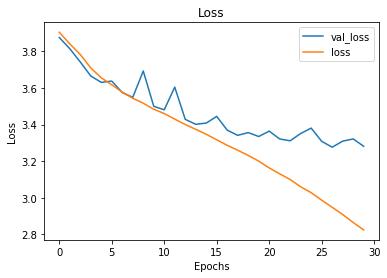

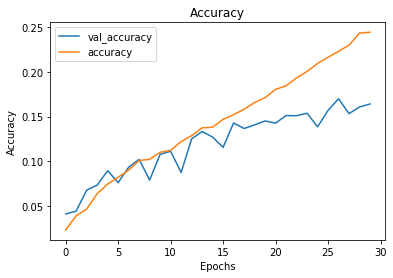

In [112]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
visualize_training_results(history)

## Model Notes

In [ ]:
#highest accuracy we've seen ~29% on train data and ~19% on test data
#Diverge around epoch, suggesting overfitting

# Tuning best model

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(128, (3, 3), activation='tanh',
                        input_shape=(64, 64, 3)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.3))


model.add(layers.Flatten())
model.add(layers.Dense(64,  activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(512, activation='tanh'))

# output layer
model.add(layers.Dense(50, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

stopping_monitor = EarlyStopping(patience = 2)

history = model.fit(train_images,
                train_labels,
                epochs=30,
                batch_size=32,
                validation_data=(val_images, val_labels),
                callbacks = [stopping_monitor]
                   )

Epoch 1/30
449/449 [==============================] - 102s 226ms/step - loss: 3.8662 - accuracy: 0.0357 - val_loss: 3.6845 - val_accuracy: 0.0715
Epoch 2/30
449/449 [==============================] - 100s 223ms/step - loss: 3.6668 - accuracy: 0.0702 - val_loss: 3.6066 - val_accuracy: 0.0807
Epoch 3/30
449/449 [==============================] - 100s 224ms/step - loss: 3.5857 - accuracy: 0.0862 - val_loss: 3.5281 - val_accuracy: 0.1003
Epoch 4/30
449/449 [==============================] - 105s 233ms/step - loss: 3.5098 - accuracy: 0.1055 - val_loss: 3.4795 - val_accuracy: 0.0997
Epoch 5/30
449/449 [==============================] - 99s 221ms/step - loss: 3.4401 - accuracy: 0.1221 - val_loss: 3.4891 - val_accuracy: 0.1052
Epoch 6/30
449/449 [==============================] - 99s 220ms/step - loss: 3.3938 - accuracy: 0.1298 - val_loss: 3.4262 - val_accuracy: 0.1278
Epoch 7/30
449/449 [==============================] - 105s 233ms/step - loss: 3.3345 - accuracy: 0.1372 - val_loss: 3.3850 - v

In [5]:
results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(test_images, test_labels)

111/111 [==============================] - 6s 56ms/step - loss: 3.2781 - accuracy: 0.1749


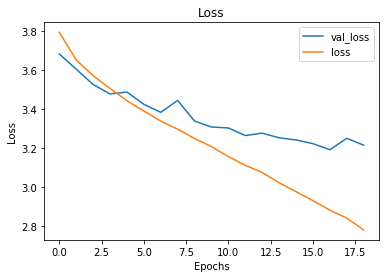

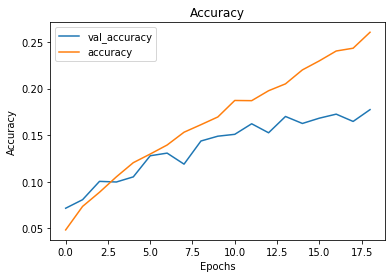

In [6]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
visualize_training_results(history)

## Tuning

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(128, (3, 3), activation='tanh',
                        input_shape=(64, 64, 3)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.3))


model.add(layers.Flatten())
model.add(layers.Dense(64,  activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(512, activation='tanh'))

# output layer
model.add(layers.Dense(50, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

stopping_monitor = EarlyStopping(patience = 2)

history = model.fit(train_images,
                train_labels,
                epochs=30,
                batch_size=32,
                validation_data=(val_images, val_labels),
                callbacks = [stopping_monitor]
                   )

Epoch 1/30
449/449 [==============================] - 106s 235ms/step - loss: 3.8514 - accuracy: 0.0377 - val_loss: 3.6568 - val_accuracy: 0.0730
Epoch 2/30
449/449 [==============================] - 109s 243ms/step - loss: 3.6228 - accuracy: 0.0811 - val_loss: 3.5981 - val_accuracy: 0.0912
Epoch 3/30
449/449 [==============================] - 104s 232ms/step - loss: 3.5150 - accuracy: 0.1114 - val_loss: 3.6045 - val_accuracy: 0.0903
Epoch 4/30
449/449 [==============================] - 115s 257ms/step - loss: 3.4000 - accuracy: 0.1389 - val_loss: 3.5700 - val_accuracy: 0.1003
Epoch 5/30
449/449 [==============================] - 114s 253ms/step - loss: 3.2975 - accuracy: 0.1634 - val_loss: 3.5170 - val_accuracy: 0.1120
Epoch 6/30
449/449 [==============================] - 103s 230ms/step - loss: 3.1797 - accuracy: 0.1939 - val_loss: 3.5508 - val_accuracy: 0.1053
Epoch 7/30
449/449 [==============================] - 104s 232ms/step - loss: 3.0727 - accuracy: 0.2194 - val_loss: 3.5352 -

In [8]:
results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(test_images, test_labels)

111/111 [==============================] - 6s 56ms/step - loss: 3.5715 - accuracy: 0.1068


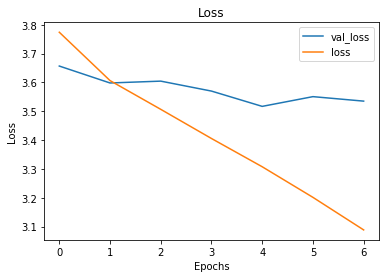

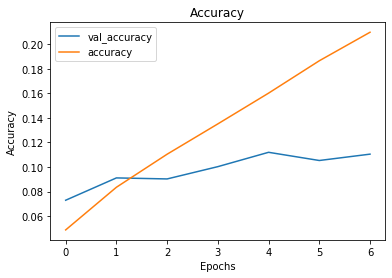

In [9]:
visualize_training_results(history)